
Processing: MachineLearningCSV.zip
Found 8 CSV files


Processing files:  12%|█▎        | 1/8 [00:12<01:26, 12.39s/it]

Loaded MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv: (692703, 80)


Processing files:  25%|██▌       | 2/8 [00:16<00:45,  7.64s/it]

Loaded MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv: (445909, 80)


Processing files:  38%|███▊      | 3/8 [00:18<00:24,  4.91s/it]

Loaded MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv: (170366, 80)


Processing files:  50%|█████     | 4/8 [00:21<00:17,  4.25s/it]

Loaded MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv: (288602, 80)


Processing files:  62%|██████▎   | 5/8 [00:28<00:15,  5.04s/it]

Loaded MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv: (529918, 80)


Processing files:  75%|███████▌  | 6/8 [00:29<00:07,  3.95s/it]

Loaded MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv: (191033, 80)


Processing files:  88%|████████▊ | 7/8 [00:32<00:03,  3.58s/it]

Loaded MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv: (286467, 80)


Processing files: 100%|██████████| 8/8 [00:35<00:00,  4.44s/it]


Loaded MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv: (225745, 80)

Processing: GeneratedLabelledFlows.zip
Found 8 CSV files


Processing files:  12%|█▎        | 1/8 [00:10<01:12, 10.29s/it]

Loaded TrafficLabelling /Wednesday-workingHours.pcap_ISCX.csv: (692703, 80)


Processing files:  25%|██▌       | 2/8 [00:17<00:51,  8.56s/it]

Loaded TrafficLabelling /Tuesday-WorkingHours.pcap_ISCX.csv: (445909, 80)


Processing files:  38%|███▊      | 3/8 [00:21<00:31,  6.32s/it]


Missing required columns in TrafficLabelling /Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Available columns: ['1-192.168.10.3-53-62133-17', '192.168.10.3', '62133', '192.168.10.1', '53', '17', '6/7/2017 9:16', '94623', '1', '1.1', '39', '249', '39.1', '39.2', '39.3', '0', '249.1', '249.2', '249.3', '0.1', '3043.657462', '21.13651015', '94623.1', '0.2', '94623.2', '94623.3', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14', '0.15', '0.16', '20', '20.1', '10.56825508', '10.56825508.1', '39.4', '249.4', '109', '121.2435565', '14700', '0.17', '0.18', '0.19', '0.20', '0.21', '0.22', '0.23', '0.24', '1.2', '163.5', '39.5', '249.5', '20.2', '0.25', '0.26', '0.27', '0.28', '0.29', '0.30', '1.3', '39.6', '1.4', '249.6', '-1', '-1.1', '0.31', '20.3', '0.32', '0.33', '0.34', '0.35', '0.36', '0.37', '0.38', '0.39', 'BENIGN', 'source_file']
Required columns: ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Label

Processing files:  50%|█████     | 4/8 [00:24<00:20,  5.25s/it]

Loaded TrafficLabelling /Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv: (288602, 80)


Processing files:  62%|██████▎   | 5/8 [00:34<00:20,  6.68s/it]

Loaded TrafficLabelling /Monday-WorkingHours.pcap_ISCX.csv: (529918, 80)


Processing files:  75%|███████▌  | 6/8 [00:36<00:10,  5.31s/it]

Loaded TrafficLabelling /Friday-WorkingHours-Morning.pcap_ISCX.csv: (191033, 80)


Processing files:  88%|████████▊ | 7/8 [00:39<00:04,  4.51s/it]

Loaded TrafficLabelling /Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv: (225745, 80)


Processing files: 100%|██████████| 8/8 [00:43<00:00,  5.49s/it]

Loaded TrafficLabelling /Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv: (286467, 80)

Common columns: 80
Combining dataframes...


Final dataset: (5491120, 80)

Preprocessing data...
Data shape after preprocessing: (5491120, 80)
Training data shape: (4392896, 78)
Testing data shape: (1098224, 78)

Training Random Forest...
RF Score: 0.9993

Training XGBoost...
XGBoost Score: 0.9992

Analysis complete!
Generating visualizations...


TypeError: 78 must be a sequence

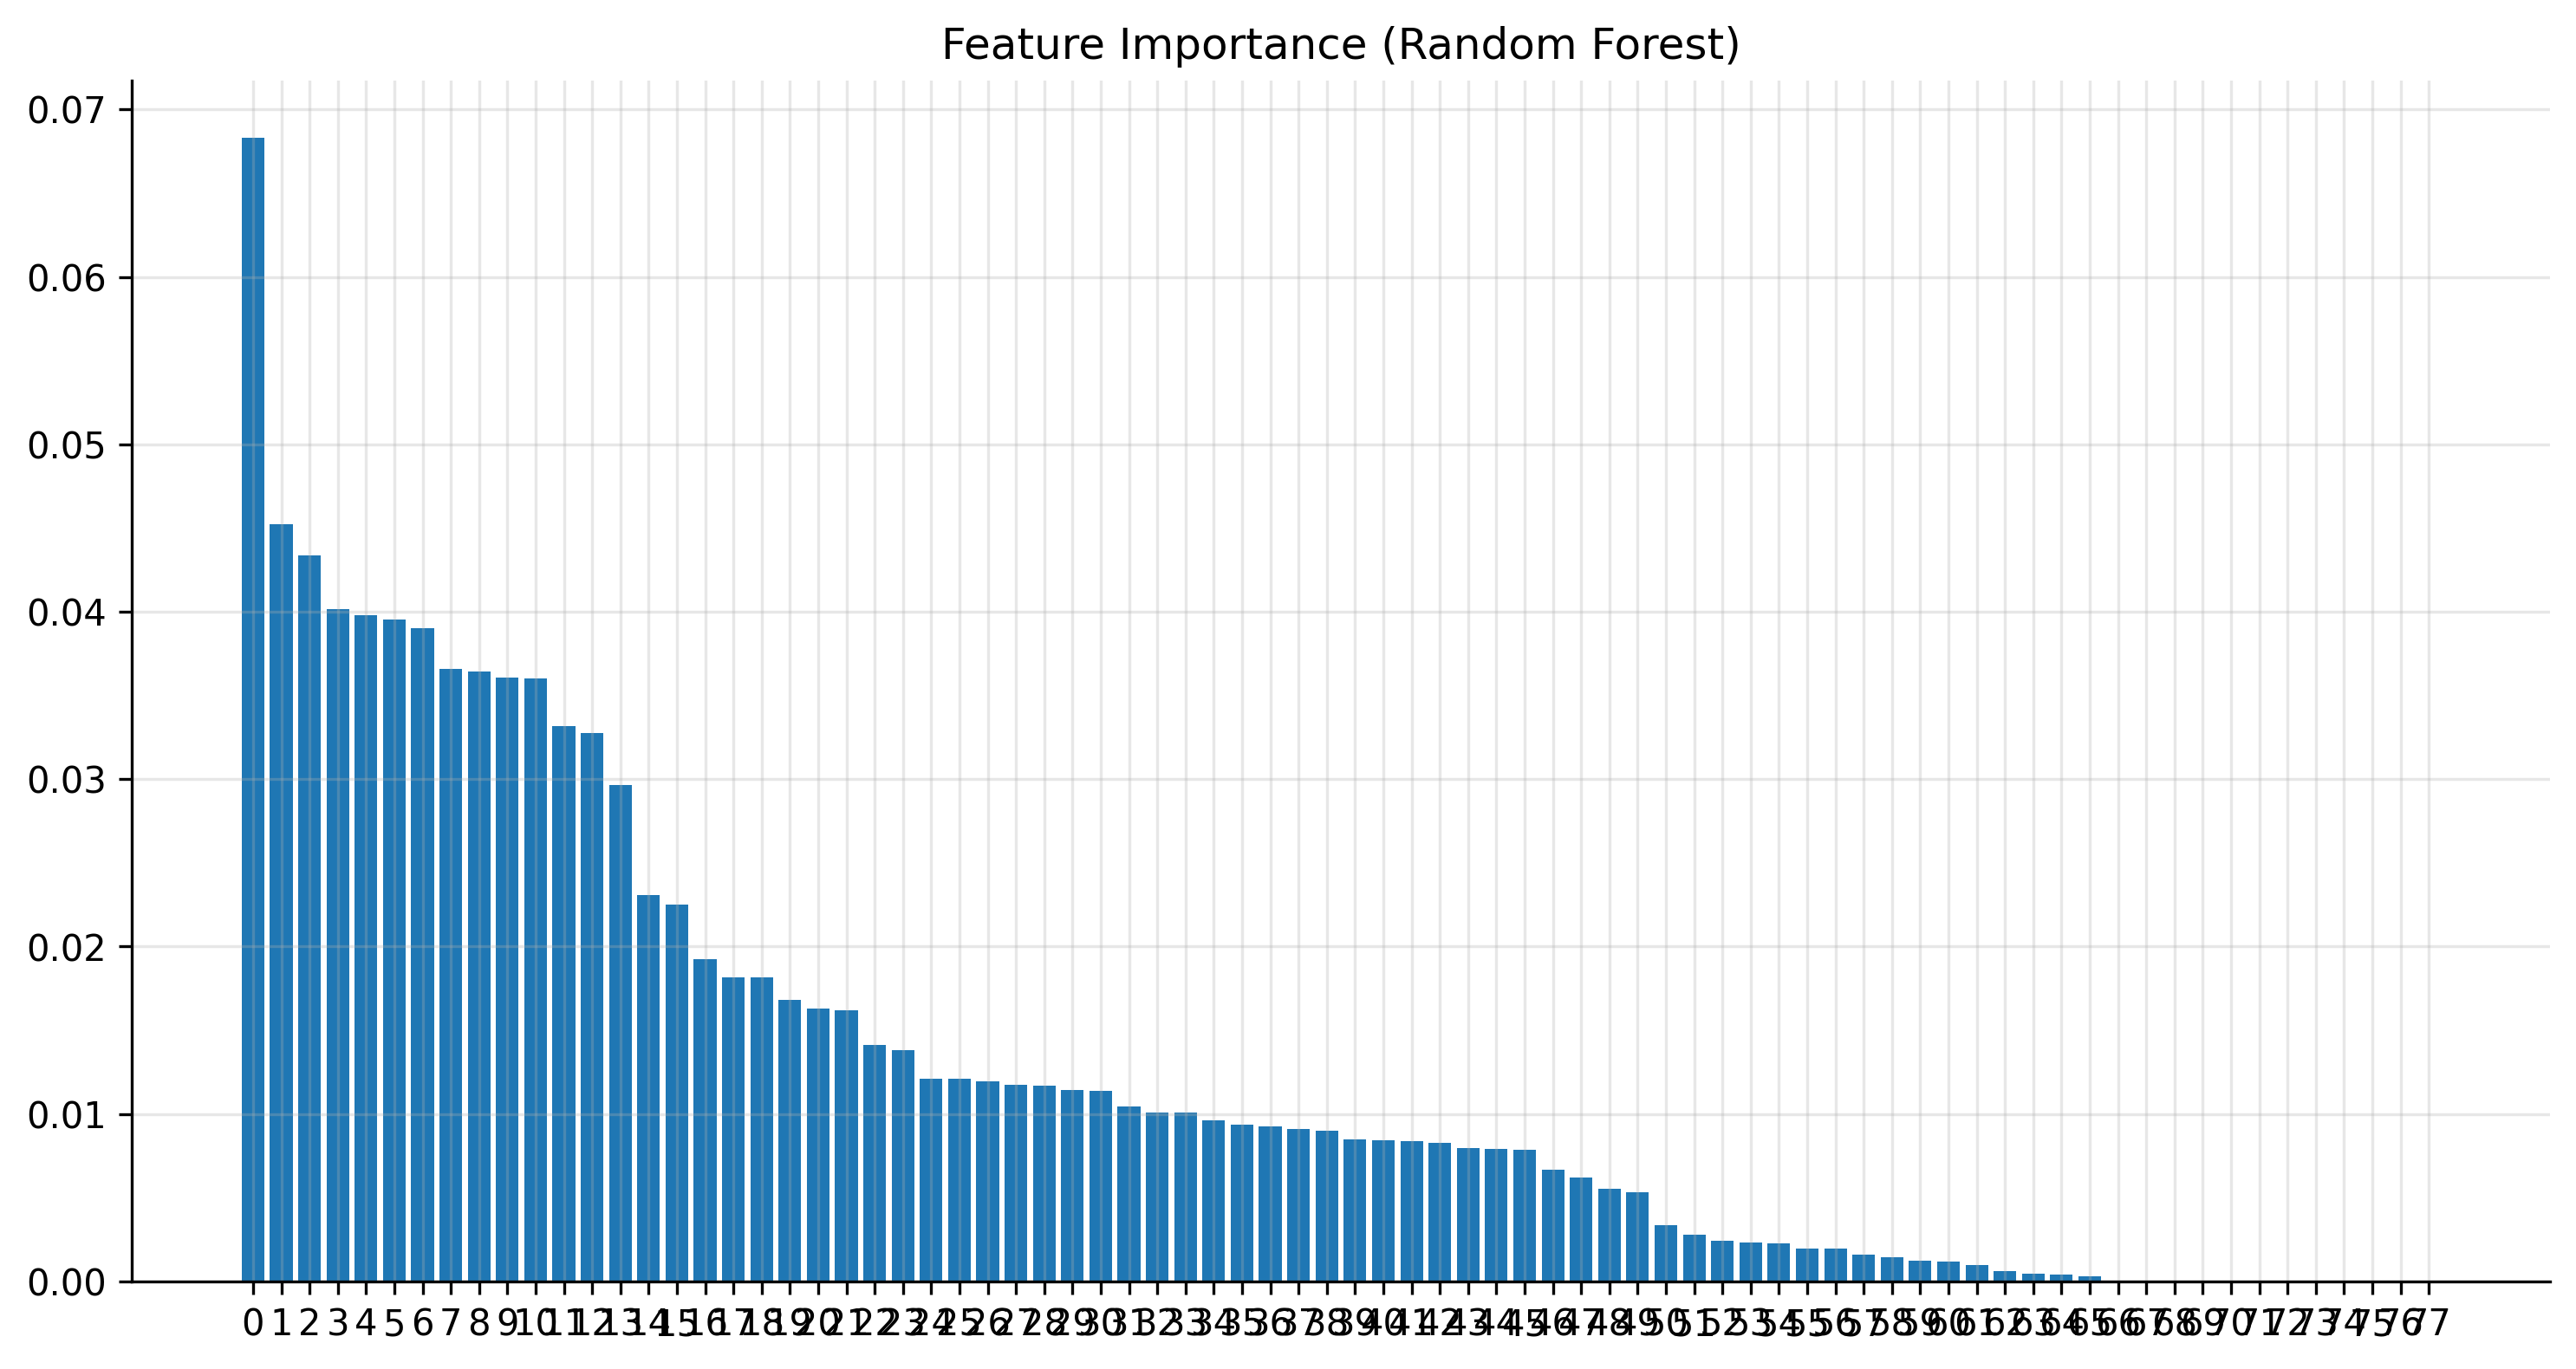

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import zipfile
import os
from tqdm import tqdm
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

warnings.filterwarnings('ignore')

class DataProcessor:
    def __init__(self, zip_paths):
        self.zip_paths = zip_paths
        self.dataframes = []
        self.combined_df = None
        self.scaler = StandardScaler()
        self.label_encoder = LabelEncoder()

    def process_csv(self, zip_ref, csv_file):
        try:
            with zip_ref.open(csv_file) as f:
                try:
                    df = pd.read_csv(f, encoding='utf-8')
                except UnicodeDecodeError:
                    df = pd.read_csv(f, encoding='latin1')

            if df.empty:
                return None

            # Add metadata
            df['source_file'] = os.path.basename(csv_file.filename)
            df.columns = df.columns.str.strip()

            # Handle different CSV formats
            if 'Flow ID' in df.columns:
                drop_cols = ['Flow ID', 'Source IP', 'Source Port',
                           'Destination IP', 'Protocol', 'Timestamp']
                df = df.drop([col for col in drop_cols if col in df.columns], axis=1)

            # Convert numeric columns to float32 for memory efficiency
            numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
            df[numeric_cols] = df[numeric_cols].astype('float32')

            # Verify columns
            required_cols = ['Destination Port', 'Flow Duration',
                           'Total Fwd Packets', 'Total Backward Packets', 'Label']

            if not all(col in df.columns for col in required_cols):
                print(f"\nMissing required columns in {csv_file.filename}")
                print("Available columns:", df.columns.tolist())
                print("Required columns:", required_cols)
                return None

            print(f"Loaded {csv_file.filename}: {df.shape}")
            return df

        except Exception as e:
            print(f"Error processing {csv_file.filename}: {str(e)}")
            return None

    def load_data(self):
        try:
            for zip_path in self.zip_paths:
                print(f"\nProcessing: {zip_path}")

                with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                    csv_files = [f for f in zip_ref.filelist
                               if f.filename.lower().endswith('.csv')]

                    print(f"Found {len(csv_files)} CSV files")

                    for csv_file in tqdm(csv_files, desc="Processing files"):
                        df = self.process_csv(zip_ref, csv_file)
                        if df is not None:
                            self.dataframes.append(df)

            if not self.dataframes:
                raise ValueError("No valid CSV files processed")

            # Find common columns
            common_cols = list(set.intersection(*[set(df.columns) for df in self.dataframes]))
            print("\nCommon columns:", len(common_cols))

            # Combine dataframes
            print("Combining dataframes...")
            self.combined_df = pd.concat(
                [df[common_cols] for df in self.dataframes],
                ignore_index=True
            )

            print(f"Final dataset: {self.combined_df.shape}")
            return True

        except Exception as e:
            print(f"Error in data loading: {str(e)}")
            return False

    def preprocess_data(self):
        try:
            if self.combined_df is None:
                raise ValueError("No data available")

            print("\nPreprocessing data...")

            # Handle numeric columns
            numeric_cols = self.combined_df.select_dtypes(
                include=['float32', 'float64', 'int64']).columns

            for col in numeric_cols:
                # Handle missing and infinite values
                self.combined_df[col] = pd.to_numeric(
                    self.combined_df[col], errors='coerce')
                median_val = self.combined_df[col].median()
                self.combined_df[col].fillna(median_val, inplace=True)

                # Handle infinities
                self.combined_df[col].replace([np.inf, -np.inf], median_val,
                                           inplace=True)

            # Handle categorical variables
            cat_cols = [col for col in self.combined_df.columns
                       if col not in ['Label', 'source_file']
                       and self.combined_df[col].dtype == 'object']

            for col in cat_cols:
                self.combined_df[col] = self.label_encoder.fit_transform(
                    self.combined_df[col].astype(str))

            # Encode target
            self.combined_df['Label'] = self.label_encoder.fit_transform(
                self.combined_df['Label'].astype(str))

            print("Data shape after preprocessing:", self.combined_df.shape)
            return True

        except Exception as e:
            print(f"Error in preprocessing: {str(e)}")
            return False

class NetworkAnalyzer:
    def __init__(self, processor):
        self.processor = processor
        self.X = None
        self.y = None
        self.models = {}

    def prepare_features(self, k_features=30, sample_size=0.1):
        try:
            # Split features and target
            X = self.processor.combined_df.drop(['Label', 'source_file'], axis=1)
            y = self.processor.combined_df['Label']

            # Stratified sampling of 10%
            _, X_sample, _, y_sample = train_test_split(
                X, y,
                test_size=sample_size,  # Take 10% sample
                stratify=y,  # Maintain class distribution
                random_state=42
            )

            # Calculate variance for feature selection
            variances = X_sample.var()
            top_k_features = variances.nlargest(k_features).index
            X_sample = X_sample[top_k_features]

            # Scale features
            X_sample = self.processor.scaler.fit_transform(X_sample)

            # Split data
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
                X, y, test_size=0.2, random_state=42)

            print("Training data shape:", self.X_train.shape)
            print("Testing data shape:", self.X_test.shape)
            return True

        except Exception as e:
            print(f"Error in feature preparation: {str(e)}")
            return False

    def train_models(self):
        try:
            # Random Forest
            print("\nTraining Random Forest...")
            rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
            rf.fit(self.X_train, self.y_train)
            rf_score = rf.score(self.X_test, self.y_test)
            print(f"RF Score: {rf_score:.4f}")

            # XGB
            print("\nTraining XGBoost...")
            # Classifier for Multi class
            xgb = XGBClassifier(n_estimators=100, n_jobs=-1)
            xgb.fit(self.X_train, self.y_train)
            xgb_score = xgb.score(self.X_test, self.y_test)
            print(f"XGBoost Score: {xgb_score:.4f}")

            # svm = SVC(probability=True)
            # svm.fit(self.X_train, self.y_train)
            # svm_score = svm.score(self.X_test, self.y_test)
            # print(f"SVM Score: {svm_score:.4f}")

            self.models = {
                'random_forest': rf,
                'xgb': xgb
            }

            return True

        except Exception as e:
            print(f"Error in model training: {str(e)}")
            return False

class NetworkVisualizer:
    def __init__(self, processor, analyzer):
        self.processor = processor
        self.analyzer = analyzer
        self.output_dir = 'visualizations'
        os.makedirs(self.output_dir, exist_ok=True)
        plt.style.use('default')  # Use default style as base

        # Configure common plotting parameters for academic publication quality
        plt.rcParams.update({
            'figure.figsize': (10, 6),
            'axes.grid': True,
            'grid.alpha': 0.3,
            'axes.labelsize': 11,
            'axes.titlesize': 12,
            'xtick.labelsize': 10,
            'ytick.labelsize': 10,
            'legend.fontsize': 10,
            'font.family': 'sans-serif',
            'font.sans-serif': ['Arial', 'DejaVu Sans'],
            'axes.spines.top': False,
            'axes.spines.right': False,
            'figure.dpi': 300,  # High resolution for publications
        })

    def save_plot(self, name):
        plt.savefig(f'{self.output_dir}/{name}.png', bbox_inches='tight', dpi=300)
        plt.close()

    def plot_traffic_patterns(self):
        df = self.processor.combined_df

        plt.figure(figsize=(15, 10))
        # Plot 1: Packet Distribution
        plt.subplot(2, 2, 1)
        sns.kdeplot(data=df, x='Total Fwd Packets', hue='Label')
        plt.title('Forward Packets Distribution by Label')

        # Plot 2: Flow Duration
        plt.subplot(2, 2, 2)
        sns.boxplot(data=df, y='Flow Duration', x='Label')
        plt.xticks(rotation=45)
        plt.title('Flow Duration by Label')

        # Plot 3: Bytes Distribution
        plt.subplot(2, 2, 3)
        sns.scatterplot(data=df, x='Total Length of Fwd Packets',
                       y='Total Length of Bwd Packets', hue='Label', alpha=0.5)
        plt.title('Forward vs Backward Packet Length')

        # Plot 4: Label Distribution
        plt.subplot(2, 2, 4)
        df['Label'].value_counts().plot(kind='bar')
        plt.title('Label Distribution')
        plt.tight_layout()
        self.save_plot('traffic_patterns')

    def plot_model_performance(self):
        plt.figure(figsize=(15, 5))

        # Plot 1: Confusion Matrices
        for i, (name, model) in enumerate(self.analyzer.models.items(), 1):
            plt.subplot(1, 2, i)
            cm = confusion_matrix(self.analyzer.y_test,
                                model.predict(self.analyzer.X_test))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.title(f'{name} Confusion Matrix')

        plt.tight_layout()
        self.save_plot('confusion_matrices')

        # ROC Curves
        plt.figure(figsize=(10, 6))
        for name, model in self.analyzer.models.items():
            y_pred = model.predict_proba(self.analyzer.X_test)
            for i in range(y_pred.shape[1]):
                fpr, tpr, _ = roc_curve(self.analyzer.y_test == i, y_pred[:, i])
                plt.plot(fpr, tpr, label=f'{name} - Class {i}')

        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curves')
        plt.legend(bbox_to_anchor=(1.05, 1))
        plt.tight_layout()
        self.save_plot('roc_curves')

    def plot_feature_importance(self):
        plt.figure(figsize=(12, 6))
        importances = self.analyzer.models['random_forest'].feature_importances_
        indices = np.argsort(importances)[::-1]

        plt.bar(range(len(importances)), importances[indices])
        plt.title('Feature Importance (Random Forest)')
        plt.xticks(range(len(importances)),
                  self.analyzer.X_train.shape[1], rotation=45)
        plt.tight_layout()
        self.save_plot('feature_importance')

    def plot_anomaly_detection(self):
        df = self.processor.combined_df

        plt.figure(figsize=(15, 10))
        # Plot 1: Flow IAT
        plt.subplot(2, 2, 1)
        sns.boxplot(data=df, x='Label', y='Flow IAT Mean')
        plt.xticks(rotation=45)
        plt.title('Flow Inter-Arrival Time Distribution')

        # Plot 2: Packet Length Statistics
        plt.subplot(2, 2, 2)
        sns.boxplot(data=df, x='Label', y='Packet Length Mean')
        plt.xticks(rotation=45)
        plt.title('Packet Length Distribution')

        # Plot 3: Flag Patterns
        flag_cols = [col for col in df.columns if 'Flag' in col]
        if flag_cols:
            plt.subplot(2, 2, 3)
            df[flag_cols].sum().plot(kind='bar')
            plt.title('Flag Distribution')
            plt.xticks(rotation=45)

        # Plot 4: Port Analysis
        plt.subplot(2, 2, 4)
        df['Destination Port'].value_counts().head(10).plot(kind='bar')
        plt.title('Top 10 Destination Ports')
        plt.tight_layout()
        self.save_plot('anomaly_detection')

    def plot_all(self):
        print("Generating visualizations...")
        self.plot_traffic_patterns()
        self.plot_model_performance()
        self.plot_feature_importance()
        self.plot_anomaly_detection()
        print(f"Visualizations saved in {self.output_dir}/")

def main():
    zip_paths = ['MachineLearningCSV.zip', 'GeneratedLabelledFlows.zip']

    # Process data
    processor = DataProcessor(zip_paths)
    if processor.load_data() and processor.preprocess_data():
        # Analyze
        analyzer = NetworkAnalyzer(processor)
        if analyzer.prepare_features():
            analyzer.train_models()
            print("\nAnalysis complete!")

            # Initialize and run visualizations
            visualizer = NetworkVisualizer(processor, analyzer)
            visualizer.plot_all()

            print("\nAnalysis and visualization complete!")
            return True
        else:
            print("\nError in feature preparation")
            return False
    else:
        print("\nError in data loading or preprocessing")
        return False

if __name__ == "__main__":
    main()

In [4]:
# !pip install cudf-cu11 dask-cudf-cu11 cuml-cu11 cugraph-cu11 cuspatial-cu11 cupy-cuda11x
# !pip install cudf-cu11 dask-cudf-cu11 rmm-cu11 nvstrings-cu11 --extra-index-url=https://pypi.ngc.nvidia.com
# !wget https://github.com/rapidsai/rapidsai-csp-utils/raw/main/colab/rapids-colab.sh
# !bash rapids-colab.sh

# !conda install -c rapidsai -c conda-forge -c nvidia \
#     cudf=23.12 cuml=23.12 cupy=12.2.0 \
#     python=3.9 cuda-version=11.8
# !pip install --upgrade pip
# !pip install cupy-cuda11x

!ldconfig -p | grep libnvrtc.so
!nvcc --version
!pip install dask pandas numpy tqdm scikit-learn scikit-optimize matplotlib seaborn scipy bayesian-optimization xgboost joblib
!pip install cupy-cuda12x  # Colab now uses CUDA 12.x
!nvidia-smi

	libnvrtc.so.12 (libc6,x86-64) => /usr/local/cuda/targets/x86_64-linux/lib/libnvrtc.so.12
	libnvrtc.so (libc6,x86-64) => /usr/local/cuda/targets/x86_64-linux/lib/libnvrtc.so
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
import joblib
import zipfile
import os
import glob
import traceback
import gc
import psutil
import xgboost as xgb
from tqdm import tqdm
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC
# import xgboost as xgb
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from bayes_opt import BayesianOptimization
import socket
import struct
from collections import Counter
import numpy.ma as ma
import json
from sklearn.metrics import roc_auc_score, roc_curve, average_precision_score, precision_recall_curve, auc

# CUDA
import cudf
import cupy as cp
# from cuml import StandardScaler
# from cuml.ensemble import RandomForestClassifier
# from cuml.svm import SVC
# from cuml.preprocessing import LabelEncoder
import multiprocessing
import time
from datetime import datetime

In [ ]:
class NetworkSecurityAnalyzerOld:
    def __init__(self, processor):
        self.processor = processor
        self.X = None
        self.y = None
        self.models = {}
        self.best_params = {}
        self.feature_importance = {}

    def load_data(self):
        """Load and prepare the dataset based on type"""
        try:
            self.df = pd.read_csv(self.data_path)

            # Handle different dataset formats
            if self.dataset_type == 'generated_labelled':
                # Remove Flow ID, Source IP, Destination IP columns as they're identifiers
                self.df = self.df.drop(['Flow ID', 'Source IP', 'Destination IP'], axis=1)

            # Convert timestamp if present
            if 'Timestamp' in self.df.columns:
                self.df['Timestamp'] = pd.to_datetime(self.df['Timestamp'])
                self.df['Hour'] = self.df['Timestamp'].dt.hour
                self.df['Day'] = self.df['Timestamp'].dt.day
                self.df = self.df.drop('Timestamp', axis=1)

            return True
        except Exception as e:
            print(f"Error loading data: {str(e)}")
            return False

    def preprocess_data(self):
        """Perform data preprocessing and cleaning"""
        try:
            # Handle missing values
            numeric_cols = self.df.select_dtypes(include=['float64', 'int64']).columns
            self.df[numeric_cols] = self.df[numeric_cols].fillna(self.df[numeric_cols].median())

            # Handle infinite values
            self.df = self.df.replace([np.inf, -np.inf], np.nan)
            self.df = self.df.fillna(self.df.mean())

            # Convert categorical variables
            categorical_cols = self.df.select_dtypes(include=['object']).columns
            for col in categorical_cols:
                if col != 'Label':  # Don't encode the target variable yet
                    self.df[col] = self.label_encoder.fit_transform(self.df[col])

            # Encode the target variable
            self.df['Label'] = self.label_encoder.fit_transform(self.df['Label'])

            return True
        except Exception as e:
            print(f"Error in preprocessing: {str(e)}")
            return False

    def perform_eda(self):
        """Perform Exploratory Data Analysis"""
        try:
            eda_results = {
                'basic_stats': self.df.describe(),
                'correlation_matrix': self.df.corr(),
                'label_distribution': self.df['Label'].value_counts(),
                'missing_values': self.df.isnull().sum(),
            }

            # Detect outliers using Z-score
            numeric_cols = self.df.select_dtypes(include=['float64', 'int64']).columns
            outliers = {}
            for col in numeric_cols:
                z_scores = np.abs(stats.zscore(self.df[col]))
                outliers[col] = len(z_scores[z_scores > 3])

            eda_results['outliers'] = outliers

            return eda_results
        except Exception as e:
            print(f"Error in EDA: {str(e)}")
            return None

    def feature_engineering(self):
        """Perform feature engineering"""
        try:
            # Calculate statistical features
            numeric_cols = self.df.select_dtypes(include=['float64', 'int64']).columns
            for col in numeric_cols:
                if col != 'Label':
                    self.df[f'{col}_zscore'] = stats.zscore(self.df[col])

            # Create ratio features for packet-related columns
            if 'Total Fwd Packets' in self.df.columns and 'Total Backward Packets' in self.df.columns:
                self.df['Packet_Ratio'] = self.df['Total Fwd Packets'] / \
                    (self.df['Total Backward Packets'] + 1)  # Add 1 to avoid division by zero

            # Create time-based features if available
            if 'Flow Duration' in self.df.columns:
                self.df['Packets_per_Second'] = (self.df['Total Fwd Packets'] +
                    self.df['Total Backward Packets']) / (self.df['Flow Duration'] + 1)

            # Create flag-based features
            flag_columns = [col for col in self.df.columns if 'Flag' in col]
            if flag_columns:
                self.df['Total_Flags'] = self.df[flag_columns].sum(axis=1)

            return True
        except Exception as e:
            print(f"Error in feature engineering: {str(e)}")
            return False

    def select_features(self, k=20):
        """Perform feature selection"""
        try:
            # Separate features and target
            X = self.df.drop('Label', axis=1)
            y = self.df['Label']

            # Select K best features
            selector = SelectKBest(score_func=f_classif, k=k)
            X_selected = selector.fit_transform(X, y)

            # Get selected feature names
            selected_features_mask = selector.get_support()
            self.selected_features = X.columns[selected_features_mask].tolist()

            # Update X with selected features
            self.X = X_selected
            self.y = y

            return self.selected_features
        except Exception as e:
            print(f"Error in feature selection: {str(e)}")
            return None

    def train_models(self):
        """Train multiple machine learning models with cross-validation"""
        try:
            # Split the data
            X_train, X_test, y_train, y_test = train_test_split(
                self.X, self.y, test_size=0.2, random_state=42)

            # Scale the features
            X_train_scaled = self.scaler.fit_transform(X_train)
            X_test_scaled = self.scaler.transform(X_test)

            # Define models
            models = {
                'random_forest': RandomForestClassifier(random_state=42),
                'gradient_boosting': GradientBoostingClassifier(random_state=42),
                'svm': SVC(random_state=42)
            }

            # Train and evaluate each model
            results = {}
            for name, model in models.items():
                # Perform k-fold cross-validation
                cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

                # Train the model
                model.fit(X_train_scaled, y_train)
                y_pred = model.predict(X_test_scaled)

                # Store results
                results[name] = {
                    'model': model,
                    'cv_scores': cv_scores,
                    'accuracy': accuracy_score(y_test, y_pred),
                    'classification_report': classification_report(y_test, y_pred),
                    'confusion_matrix': confusion_matrix(y_test, y_pred)
                }

                self.models[name] = model

            return results
        except Exception as e:
            print(f"Error in model training: {str(e)}")
            return None

    def optimize_hyperparameters(self, model_name='random_forest'):
        """Perform Bayesian optimization for hyperparameter tuning"""
        try:
            if model_name == 'random_forest':
                def rf_objective(n_estimators, max_depth, min_samples_split):
                    model = RandomForestClassifier(
                        n_estimators=int(n_estimators),
                        max_depth=int(max_depth),
                        min_samples_split=int(min_samples_split),
                        random_state=42
                    )
                    return np.mean(cross_val_score(model, self.X, self.y, cv=5))

                optimizer = BayesianOptimization(
                    f=rf_objective,
                    pbounds={
                        'n_estimators': (10, 300),
                        'max_depth': (3, 20),
                        'min_samples_split': (2, 10)
                    },
                    random_state=42
                )

                optimizer.maximize(init_points=5, n_iter=25)
                return optimizer.max

            return None
        except Exception as e:
            print(f"Error in hyperparameter optimization: {str(e)}")
            return None

    def analyze_network_packets(self):
        """Analyze network packets for security patterns"""
        try:
            packet_analysis = {}

            # Analyze port distributions
            if 'Destination Port' in self.df.columns:
                port_counts = self.df['Destination Port'].value_counts()
                suspicious_ports = port_counts[port_counts > port_counts.mean() + 2*port_counts.std()]
                packet_analysis['suspicious_ports'] = suspicious_ports.to_dict()

            # Analyze packet lengths
            if 'Total Length of Fwd Packets' in self.df.columns:
                packet_analysis['packet_length_stats'] = {
                    'mean': self.df['Total Length of Fwd Packets'].mean(),
                    'std': self.df['Total Length of Fwd Packets'].std(),
                    'suspicious_lengths': len(self.df[
                        self.df['Total Length of Fwd Packets'] >
                        self.df['Total Length of Fwd Packets'].mean() +
                        3*self.df['Total Length of Fwd Packets'].std()
                    ])
                }

            # Analyze flags
            flag_columns = [col for col in self.df.columns if 'Flag' in col]
            if flag_columns:
                flag_patterns = self.df[flag_columns].sum().to_dict()
                packet_analysis['flag_patterns'] = flag_patterns

            return packet_analysis
        except Exception as e:
            print(f"Error in packet analysis: {str(e)}")
            return None

    def detect_anomalies(self):
        """Detect anomalies in network traffic"""
        try:
            anomalies = {}

            # Calculate Z-scores for numeric columns
            numeric_cols = self.df.select_dtypes(include=['float64', 'int64']).columns
            for col in numeric_cols:
                if col != 'Label':
                    z_scores = np.abs(stats.zscore(self.df[col]))
                    anomalies[col] = self.df[z_scores > 3].index.tolist()

            # Detect unusual port scanning behavior
            if 'Destination Port' in self.df.columns and 'Source Port' in self.df.columns:
                port_scan_threshold = 10  # Configurable threshold
                port_scan_suspects = self.df.groupby('Source Port')['Destination Port'].nunique()
                anomalies['port_scan_suspects'] = port_scan_suspects[
                    port_scan_suspects > port_scan_threshold].index.tolist()

            return anomalies
        except Exception as e:
            print(f"Error in anomaly detection: {str(e)}")
            return None

    def analyze_protocol_behavior(self):
        """Analyze protocol-specific behavior patterns"""
        try:
            protocol_analysis = {}

            if 'Protocol' in self.df.columns:
                # Analyze protocol distribution
                protocol_dist = self.df['Protocol'].value_counts()
                protocol_analysis['protocol_distribution'] = protocol_dist.to_dict()

                # Analyze protocol-specific metrics
                for protocol in protocol_dist.index:
                    protocol_data = self.df[self.df['Protocol'] == protocol]
                    protocol_analysis[f'protocol_{protocol}'] = {
                        'avg_duration': protocol_data['Flow Duration'].mean(),
                        'avg_packets': (protocol_data['Total Fwd Packets'] +
                                     protocol_data['Total Backward Packets']).mean(),
                        'avg_bytes': (protocol_data['Total Length of Fwd Packets'] +
                                    protocol_data['Total Length of Bwd Packets']).mean()
                    }

            return protocol_analysis
        except Exception as e:
            print(f"Error in protocol analysis: {str(e)}")
            return None

    def save_model(self, model_name, path):
        """Save a trained model to disk"""
        try:
            if model_name in self.models:
                joblib.dump(self.models[model_name], path)
                return True
            return False
        except Exception as e:
            print(f"Error saving model: {str(e)}")
            return False

    def load_model(self, model_name, path):
        """Load a trained model from disk"""
        try:
            self.models[model_name] = joblib.load(path)
            return True
        except Exception as e:
            print(f"Error loading model: {str(e)}")
            return False

In [7]:
class NetworkSecurityVisualizerOld:
    def __init__(self, analyzer):
        """
        Initialize the Network Security Visualizer

        Parameters:
        analyzer (NetworkSecurityAnalyzer): Instance of NetworkSecurityAnalyzer
        """
        self.analyzer = analyzer
        self.plt_style = 'seaborn'
        plt.style.use(self.plt_style)

    def plot_traffic_patterns(self):
        """Visualize network traffic patterns"""
        try:
            fig = plt.figure(figsize=(15, 10))

            # Plot 1: Traffic Volume Over Time
            if 'Hour' in self.analyzer.df.columns:
                plt.subplot(2, 2, 1)
                hourly_traffic = self.analyzer.df.groupby('Hour').size()
                hourly_traffic.plot(kind='line', title='Traffic Volume by Hour')
                plt.xlabel('Hour of Day')
                plt.ylabel('Number of Connections')

            # Plot 2: Protocol Distribution
            if 'Protocol' in self.analyzer.df.columns:
                plt.subplot(2, 2, 2)
                protocol_dist = self.analyzer.df['Protocol'].value_counts()
                protocol_dist.plot(kind='pie', autopct='%1.1f%%',
                                 title='Protocol Distribution')

            # Plot 3: Packet Length Distribution
            if 'Total Length of Fwd Packets' in self.analyzer.df.columns:
                plt.subplot(2, 2, 3)
                sns.histplot(data=self.analyzer.df,
                           x='Total Length of Fwd Packets', bins=50)
                plt.title('Forward Packet Length Distribution')
                plt.xlabel('Packet Length')

            # Plot 4: Attack Label Distribution
            plt.subplot(2, 2, 4)
            self.analyzer.df['Label'].value_counts().plot(kind='bar',
                title='Traffic Label Distribution')
            plt.xlabel('Label')
            plt.ylabel('Count')

            plt.tight_layout()
            return fig
        except Exception as e:
            print(f"Error in traffic pattern visualization: {str(e)}")
            return None

    def plot_feature_importance(self, model_name='random_forest'):
        """Visualize feature importance"""
        try:
            if model_name in self.analyzer.models:
                model = self.analyzer.models[model_name]

                if hasattr(model, 'feature_importances_'):
                    importance = model.feature_importances_
                    features = self.analyzer.selected_features

                    plt.figure(figsize=(12, 6))
                    importance_df = pd.DataFrame({
                        'feature': features,
                        'importance': importance
                    }).sort_values('importance', ascending=False)

                    sns.barplot(x='importance', y='feature', data=importance_df)
                    plt.title(f'Feature Importance ({model_name})')
                    plt.tight_layout()
                    return plt.gcf()
            return None
        except Exception as e:
            print(f"Error in feature importance visualization: {str(e)}")
            return None

    def plot_anomaly_patterns(self):
        """Visualize anomaly patterns"""
        try:
            fig = plt.figure(figsize=(15, 10))

            # Plot 1: Port Scanning Activity
            plt.subplot(2, 2, 1)
            port_counts = self.analyzer.df['Destination Port'].value_counts()
            sns.histplot(data=self.analyzer.df, x='Destination Port', bins=50)
            plt.title('Destination Port Distribution')
            plt.xlabel('Port Number')

            # Plot 2: Flow Duration vs Packet Count
            plt.subplot(2, 2, 2)
            plt.scatter(self.analyzer.df['Flow Duration'],
                       self.analyzer.df['Total Fwd Packets'],
                       alpha=0.5)
            plt.title('Flow Duration vs Packet Count')
            plt.xlabel('Flow Duration')
            plt.ylabel('Total Forward Packets')

            # Plot 3: Packet Length Anomalies
            plt.subplot(2, 2, 3)
            sns.boxplot(data=self.analyzer.df,
                       y='Total Length of Fwd Packets')
            plt.title('Packet Length Distribution (Box Plot)')

            # Plot 4: Flag Patterns
            flag_columns = [col for col in self.analyzer.df.columns if 'Flag' in col]
            if flag_columns:
                plt.subplot(2, 2, 4)
                self.analyzer.df[flag_columns].sum().plot(kind='bar')
                plt.title('Flag Distribution')
                plt.xticks(rotation=45)

            plt.tight_layout()
            return fig
        except Exception as e:
            print(f"Error in anomaly pattern visualization: {str(e)}")
            return None

    def generate_security_report(analyzer, visualizer):
      """Generate a comprehensive security analysis report"""
      try:
          report = {
              'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
              'summary': {},
              'anomalies': {},
              'recommendations': []
          }

          # Basic Statistics
          total_flows = len(analyzer.df)
          attack_flows = len(analyzer.df[analyzer.df['Label'] != 0])
          report['summary']['total_flows'] = total_flows
          report['summary']['attack_percentage'] = (attack_flows / total_flows) * 100

          # Traffic Patterns
          if 'Protocol' in analyzer.df.columns:
              report['summary']['protocol_distribution'] = \
                  analyzer.df['Protocol'].value_counts().to_dict()

          # Anomaly Detection
          anomalies = analyzer.detect_anomalies()
          report['anomalies'] = anomalies

          # Port Scanning Detection
          if 'Destination Port' in analyzer.df.columns:
              port_scan_threshold = 100  # Configurable
              potential_scanners = analyzer.df.groupby('Source Port')\
                  ['Destination Port'].nunique()
              report['anomalies']['potential_port_scanners'] = \
                  potential_scanners[potential_scanners > port_scan_threshold]\
                      .index.tolist()

          # Generate Recommendations
          if attack_flows > 0:
              report['recommendations'].append(
                  "Implement additional monitoring for suspicious traffic patterns")

          if anomalies and len(anomalies.get('port_scan_suspects', [])) > 0:
              report['recommendations'].append(
                  "Consider implementing port scanning prevention measures")

          # Model Performance
          if analyzer.models:
              report['model_performance'] = {}
              for name, model in analyzer.models.items():
                  if hasattr(model, 'score'):
                      score = model.score(analyzer.X, analyzer.y)
                      report['model_performance'][name] = score

          return report
      except Exception as e:
          print(f"Error generating report: {str(e)}")
          return None

In [8]:
class NetworkSecurityAnalyzer:
    def __init__(self, zip_paths=None):
        self.zip_paths = zip_paths
        self.dataframes = []
        self.df = None  # Combined DataFrame
        self.X = None
        self.y = None
        self.models = {}
        self.best_params = {}
        self.feature_importance = {}
        self.selected_features = None
        self.scaler = StandardScaler()
        self.label_encoder = LabelEncoder()
        self.preprocessed = False

    def analyze_sample_columns(self):
        """Analyze sample data to determine column mappings"""
        # From the sample data provided, we can see these patterns:
        machine_learning_columns = {
            'Destination Port', 'Flow Duration', 'Total Fwd Packets',
            'Total Backward Packets', 'Total Length of Fwd Packets',
            'Total Length of Bwd Packets', 'Fwd Packet Length Max',
            'Fwd Packet Length Min', 'Fwd Packet Length Mean',
            'Fwd Packet Length Std', 'Bwd Packet Length Max',
            'Bwd Packet Length Min', 'Bwd Packet Length Mean',
            'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
            'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
            'Flow IAT Min', 'Label'
        }

        generated_flows_columns = {
            'Flow ID', 'Source IP', 'Source Port', 'Destination IP',
            'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
            'Total Fwd Packets', 'Total Backward Packets',
            'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
            'Label'
        }

        return machine_learning_columns, generated_flows_columns

    def load_data(self):
        """Load data from zip files based on sample analysis"""
        try:
            if not self.zip_paths:
                raise ValueError("No zip paths provided")

            print("\nStarting data loading process...")
            successful_loads = 0

            # Get expected column patterns from samples
            ml_columns, gen_columns = self.analyze_sample_columns()
            print("\nAnalyzed column patterns from samples")

            for zip_path in self.zip_paths:
                if not os.path.exists(zip_path):
                    print(f"Warning: Zip file not found: {zip_path}")
                    continue

                print(f"\nProcessing zip file: {zip_path}")

                with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                    csv_files = [f for f in zip_ref.namelist()
                              if f.lower().endswith('.csv')]

                    print(f"Found {len(csv_files)} CSV files")

                    for csv_file in tqdm(csv_files, desc="Processing files"):
                        try:
                            # Try reading the file
                            try:
                                with zip_ref.open(csv_file) as f:
                                    df = pd.read_csv(f, encoding='utf-8')
                            except UnicodeDecodeError:
                                with zip_ref.open(csv_file) as f:
                                    df = pd.read_csv(f, encoding='latin1')

                            if df.empty:
                                print(f"\nSkipping empty file: {csv_file}")
                                continue

                            # Clean column names
                            df.columns = df.columns.str.strip()
                            current_columns = set(df.columns)

                            # Determine file type based on columns
                            is_ml_format = len(current_columns.intersection(ml_columns)) > len(current_columns.intersection(gen_columns))

                            if is_ml_format:
                                # Machine Learning CSV format
                                expected_columns = ml_columns
                            else:
                                # Generated Labelled Flows format
                                expected_columns = gen_columns
                                # Drop identifier columns
                                drop_cols = ['Flow ID', 'Source IP', 'Source Port',
                                          'Destination IP', 'Protocol', 'Timestamp']
                                df = df.drop([col for col in drop_cols
                                            if col in df.columns], axis=1)

                            # Verify essential columns exist
                            essential_cols = {'Destination Port', 'Flow Duration',
                                            'Total Fwd Packets', 'Total Backward Packets',
                                            'Label'}
                            if not essential_cols.issubset(set(df.columns)):
                                missing = essential_cols - set(df.columns)
                                print(f"\nSkipping file missing essential columns: {csv_file}")
                                print(f"Missing columns: {missing}")
                                continue

                            # Add source information
                            df['source_file'] = os.path.basename(csv_file)

                            print(f"\nSuccessfully loaded {csv_file}")
                            print(f"Shape: {df.shape}")
                            self.dataframes.append(df)
                            successful_loads += 1

                        except Exception as e:
                            print(f"\nSkipping problematic file {csv_file}: {str(e)}")
                            continue

            if not self.dataframes:
                raise ValueError("No valid dataframes were loaded")

            print(f"\nSuccessfully loaded {successful_loads} files")

            # Find actual common columns across loaded dataframes
            common_cols = set.intersection(*[set(df.columns) for df in self.dataframes])
            print("\nActual common columns found:", sorted(list(common_cols)))

            # Combine dataframes using common columns
            self.df = pd.concat([df[list(common_cols)] for df in self.dataframes],
                              ignore_index=True)

            print(f"\nFinal combined dataset:")
            print(f"Shape: {self.df.shape}")
            print(f"Columns: {sorted(self.df.columns.tolist())}")
            print("\nLabel distribution:")
            print(self.df['Label'].value_counts().head())

            return True

        except Exception as e:
            print(f"\nError in data loading: {str(e)}")
            return False

    def preprocess_data(self):
        """Enhanced preprocessing with validation"""
        try:
            if self.df is None or len(self.df) == 0:
                raise ValueError("No data available for preprocessing")

            print("\nStarting data preprocessing...")
            self.df = self.df.copy()

            # Handle Label column first
            if 'Label' not in self.df.columns:
                raise ValueError("Label column not found")

            # Clean and encode labels
            nan_labels = self.df['Label'].isna().sum()
            if nan_labels > 0:
                print(f"Removing {nan_labels} rows with missing labels")
                self.df = self.df.dropna(subset=['Label'])

            if len(self.df) == 0:
                raise ValueError("No data remaining after removing invalid labels")

            self.df['Label'] = self.df['Label'].astype(str)
            self.df['Label'] = self.label_encoder.fit_transform(self.df['Label'])

            # Clean numeric columns
            numeric_cols = self.df.select_dtypes(include=['float64', 'int64']).columns

            for col in numeric_cols:
                self.df[col] = pd.to_numeric(self.df[col], errors='coerce')
                valid_mask = ~(self.df[col].isna() | self.df[col].isin([np.inf, -np.inf]))

                if valid_mask.any():
                    median_val = self.df.loc[valid_mask, col].median()
                    q1 = self.df.loc[valid_mask, col].quantile(0.01)
                    q3 = self.df.loc[valid_mask, col].quantile(0.99)
                    iqr = q3 - q1
                    lower_bound = q1 - (3 * iqr)
                    upper_bound = q3 + (3 * iqr)

                    self.df[col] = self.df[col].replace([np.inf, -np.inf], median_val)
                    self.df[col] = self.df[col].fillna(median_val)
                    self.df[col] = self.df[col].clip(lower_bound, upper_bound)
                else:
                    print(f"Warning: No valid data in column {col}")
                    self.df[col] = 0

            # Handle categorical columns
            cat_cols = [col for col in self.df.select_dtypes(include=['object']).columns
                        if col not in ['source_file']]

            for col in cat_cols:
                self.df[col] = self.label_encoder.fit_transform(self.df[col].fillna('unknown'))

            self.preprocessed = True
            print("\nPreprocessing complete")
            print(f"Final shape: {self.df.shape}")
            print("\nLabel distribution:")
            print(self.df['Label'].value_counts())

            return True

        except Exception as e:
            print(f"Error in preprocessing: {str(e)}")
            traceback.print_exc()
            return False

    def validate_data(self):
        """Validate data before training"""
        try:
            if self.X is None or self.y is None:
                raise ValueError("Features (X) or labels (y) not found. Run feature selection first.")

            if len(self.X) == 0 or len(self.y) == 0:
                raise ValueError("Empty dataset.")

            if len(self.X) != len(self.y):
                raise ValueError(f"Mismatched lengths: X ({len(self.X)}) and y ({len(self.y)})")

            # Check for NaN or infinite values
            if np.any(np.isnan(self.X)) or np.any(np.isinf(self.X)):
                print("Warning: Found NaN or infinite values in features. Cleaning...")
                self.X = np.nan_to_num(self.X, nan=0, posinf=0, neginf=0)

            # Validate labels
            unique_labels = np.unique(self.y)
            if len(unique_labels) < 2:
                raise ValueError(f"Found only {len(unique_labels)} unique classes. Need at least 2.")

            print("\nData Validation Summary:")
            print(f"Features shape: {self.X.shape}")
            print(f"Labels shape: {self.y.shape}")
            print(f"Number of classes: {len(unique_labels)}")
            print("Class distribution:")
            for label in unique_labels:
                count = np.sum(self.y == label)
                print(f"Class {label}: {count:,} samples ({count/len(self.y)*100:.2f}%)")

            return True
        except Exception as e:
            print(f"Data validation failed: {str(e)}")
            return False

    def perform_eda(self):
        """Perform Exploratory Data Analysis"""
        try:
            # Create a copy of the dataframe
            df_eda = self.df.copy()
            # Remove non-numeric columns for basic stats
            df_eda = df_eda.drop(['source_file'], axis=1)

            eda_results = {
                'basic_stats': df_eda.describe().to_dict(),
                'missing_values': df_eda.isnull().sum().to_dict(),
                'correlation_matrix': df_eda.corr().round(3).to_dict(),
                'label_distribution': df_eda['Label'].value_counts().to_dict(),
                'feature_stats': {}
            }

            # Analyze numeric columns
            numeric_cols = df_eda.select_dtypes(include=['float64', 'int64']).columns

            for col in numeric_cols:
                if col != 'Label':
                    eda_results['feature_stats'][col] = {
                        'mean': float(df_eda[col].mean()),
                        'median': float(df_eda[col].median()),
                        'std': float(df_eda[col].std()),
                        'skew': float(df_eda[col].skew()),
                        'kurtosis': float(df_eda[col].kurtosis())
                    }

            # Save EDA results
            with open('eda_results.json', 'w') as f:
                json.dump(eda_results, f, indent=4, default=str)

            return eda_results

        except Exception as e:
            print(f"Error in EDA: {str(e)}")
            return None

    def feature_engineering(self):
        """Perform feature engineering"""
        try:
            print("\nPerforming feature engineering...")

            # Create a copy of the dataframe to avoid fragmentation
            df_new = self.df.copy()
            new_features = {}

            # Create ratio features
            if all(col in df_new.columns for col in ['Total Fwd Packets', 'Total Backward Packets']):
                new_features['Packet_Ratio'] = df_new['Total Fwd Packets'] / \
                    (df_new['Total Backward Packets'] + 1)

            # Create rate features
            if 'Flow Duration' in df_new.columns:
                new_features['Bytes_per_Second'] = (
                    df_new['Total Length of Fwd Packets'] +
                    df_new['Total Length of Bwd Packets']) / \
                    (df_new['Flow Duration'] + 1)

                new_features['Packets_per_Second'] = (
                    df_new['Total Fwd Packets'] +
                    df_new['Total Backward Packets']) / \
                    (df_new['Flow Duration'] + 1)

            # Create flag-based features
            flag_cols = [col for col in df_new.columns if 'Flag' in col]
            if flag_cols:
                new_features['Total_Flags'] = df_new[flag_cols].sum(axis=1)

            # Create statistical features
            numeric_cols = df_new.select_dtypes(include=['float64', 'int64']).columns
            z_scores = {}

            for col in numeric_cols:
                if col != 'Label':
                    z_scores[f'{col}_zscore'] = stats.zscore(df_new[col], nan_policy='omit')

            # Add all new features at once
            new_features.update(z_scores)
            df_new = pd.concat([df_new, pd.DataFrame(new_features)], axis=1)

            self.df = df_new
            print("Feature engineering complete.")
            return True

        except Exception as e:
            print(f"Error in feature engineering: {str(e)}")
            return False

    def clean_and_validate_chunk(self, chunk, feature_cols):
        """Helper method to clean data chunk"""
        try:
            cleaned_chunk = chunk[feature_cols].copy()

            # Stats dictionary to track changes
            cleaning_stats = {
                'inf_replacements': 0,
                'outliers_clipped': 0,
                'nans_filled': 0
            }

            for col in feature_cols:
                # Track original problematic values
                inf_mask = np.isinf(cleaned_chunk[col])
                cleaning_stats['inf_replacements'] += inf_mask.sum()

                nan_mask = cleaned_chunk[col].isna()
                cleaning_stats['nans_filled'] += nan_mask.sum()

                # Calculate robust statistics
                valid_data = cleaned_chunk[col][~(inf_mask | nan_mask)]
                if len(valid_data) > 0:
                    q1 = valid_data.quantile(0.01)
                    q3 = valid_data.quantile(0.99)
                    iqr = q3 - q1
                    lower_bound = q1 - (1.5 * iqr)
                    upper_bound = q3 + (1.5 * iqr)

                    # Replace infinities with bounds
                    cleaned_chunk[col] = cleaned_chunk[col].replace([np.inf], upper_bound)
                    cleaned_chunk[col] = cleaned_chunk[col].replace([-np.inf], lower_bound)

                    # Clip outliers
                    outliers_mask = (cleaned_chunk[col] < lower_bound) | (cleaned_chunk[col] > upper_bound)
                    cleaning_stats['outliers_clipped'] += outliers_mask.sum()
                    cleaned_chunk[col] = cleaned_chunk[col].clip(lower_bound, upper_bound)

                    # Fill NaN with median of valid data
                    median_val = valid_data.median()
                    cleaned_chunk[col] = cleaned_chunk[col].fillna(median_val)
                else:
                    # If no valid data in column, fill with 0
                    print(f"Warning: No valid data in column {col}")
                    cleaned_chunk[col] = cleaned_chunk[col].fillna(0)

            return cleaned_chunk, cleaning_stats

        except Exception as e:
            print(f"Error in data cleaning: {str(e)}")
            raise

    def select_features(self, k=30, method='mutual_info', chunk_size=30000):
        """Memory-efficient feature selection with duplicate handling"""
        try:
            print(f"\nSelecting top {k} features...")
            start_time = time.time()

            # Get base feature columns (exclude _zscore duplicates and metadata)
            all_cols = set(self.df.columns)
            zscore_cols = {col for col in all_cols if '_zscore' in col}
            base_cols = all_cols - zscore_cols - {'Label', 'source_file'}
            feature_cols = list(base_cols)

            print(f"Found {len(feature_cols)} base features")

            # Initialize arrays for feature scores
            feature_scores = np.zeros(len(feature_cols))

            # Process data in chunks
            chunk_start = 0
            n_samples = len(self.df)

            while chunk_start < n_samples:
                chunk_end = min(chunk_start + chunk_size, n_samples)
                X_chunk, chunk_stats = self.clean_and_validate_chunk(
                    self.df.iloc[chunk_start:chunk_end], feature_cols)
                y_chunk = self.df.iloc[chunk_start:chunk_end]['Label'].astype('int32')

                if method == 'mutual_info':
                    chunk_scores = mutual_info_classif(
                        X_chunk, y_chunk,
                        discrete_features=False,
                        n_neighbors=3,
                        random_state=42
                    )
                else:
                    chunk_scores = f_classif(X_chunk, y_chunk)[0]

                weight = len(X_chunk) / n_samples
                feature_scores += chunk_scores * weight
                chunk_start = chunk_end

            # Select top k features
            top_k_idx = np.argsort(feature_scores)[-k:]
            self.selected_features = [feature_cols[i] for i in top_k_idx]

            print("\nSelected features:", self.selected_features)
            return self.selected_features

        except Exception as e:
            print(f"Error in feature selection: {str(e)}")
            return None

    def train_models(self):
        """Train models with extensive error handling and validation"""
        try:
            print("\nStarting model training process...")

            # Validate preprocessing
            if not hasattr(self, 'preprocessed') or not self.preprocessed:
                print("Data not preprocessed. Running preprocessing...")
                if not self.preprocess_data():
                    raise ValueError("Preprocessing failed")

            # Validate data
            if not self.validate_data():
                raise ValueError("Data validation failed")

            # Convert data types safely
            try:
                X = np.array(self.X, dtype=np.float32)
                y = np.array(self.y, dtype=np.int32)
            except Exception as e:
                print(f"Error converting data types: {str(e)}")
                print("Attempting to clean and convert data...")
                # Backup conversion with cleaning
                X = np.array([[float(val) if val not in ['', 'nan', 'inf', '-inf'] else 0
                              for val in row] for row in self.X], dtype=np.float32)
                y = np.array([int(val) if val not in ['', 'nan'] else 0
                            for val in self.y], dtype=np.int32)

            # Handle class imbalance
            unique_classes = np.unique(y)
            class_counts = np.bincount(y)
            max_count = np.max(class_counts)
            class_weights = {i: max_count/count if count > 0 else 1.0
                            for i, count in enumerate(class_counts)}

            print("\nClass weights calculated:", class_weights)

            # Split data with stratification
            try:
                X_train, X_test, y_train, y_test = train_test_split(
                    X, y,
                    test_size=0.2,
                    stratify=y,
                    random_state=42
                )
            except ValueError as e:
                print(f"Stratification failed: {str(e)}")
                print("Falling back to random split...")
                X_train, X_test, y_train, y_test = train_test_split(
                    X, y,
                    test_size=0.2,
                    stratify=None,
                    random_state=42
                )

            results = {}

            # Train Random Forest
            print("\nTraining Random Forest...")
            try:
                rf = RandomForestClassifier(
                    n_estimators=100,
                    max_depth=None,
                    class_weight=class_weights,
                    n_jobs=-1,
                    random_state=42
                )
                rf.fit(X_train, y_train)
                rf_pred = rf.predict(X_test)

                results['random_forest'] = {
                    'accuracy': accuracy_score(y_test, rf_pred),
                    'predictions': rf_pred,
                    'probabilities': rf.predict_proba(X_test),
                    'classification_report': classification_report(
                        y_test, rf_pred,
                        zero_division=0,
                        digits=4
                    )
                }
                print(f"RF Accuracy: {results['random_forest']['accuracy']:.4f}")

            except Exception as e:
                print(f"Random Forest training failed: {str(e)}")
                results['random_forest'] = None

            # Train XGBoost
            print("\nTraining XGBoost...")
            try:
                xgb_model = xgb.XGBClassifier(
                    n_estimators=100,
                    max_depth=6,
                    learning_rate=0.1,
                    tree_method='hist',
                    grow_policy='lossguide',
                    max_bin=256,
                    n_jobs=-1,
                    random_state=42
                )

                # Calculate sample weights
                sample_weights = np.array([class_weights[c] for c in y_train])

                xgb_model.fit(
                    X_train, y_train,
                    sample_weight=sample_weights,
                    eval_set=[(X_test, y_test)],
                    verbose=False
                )

                xgb_pred = xgb_model.predict(X_test)

                results['xgboost'] = {
                    'accuracy': accuracy_score(y_test, xgb_pred),
                    'predictions': xgb_pred,
                    'probabilities': xgb_model.predict_proba(X_test),
                    'classification_report': classification_report(
                        y_test, xgb_pred,
                        zero_division=0,
                        digits=4
                    )
                }
                print(f"XGBoost Accuracy: {results['xgboost']['accuracy']:.4f}")

            except Exception as e:
                print(f"XGBoost training failed: {str(e)}")
                results['xgboost'] = None

            # Store successful models and results
            self.models = {}
            if results['random_forest'] is not None:
                self.models['random_forest'] = rf
            if results['xgboost'] is not None:
                self.models['xgboost'] = xgb_model

            self.results = results

            # Print final summary
            print("\nTraining Summary:")
            successful_models = sum(1 for r in results.values() if r is not None)
            print(f"Successfully trained {successful_models} out of 2 models")

            # Save training results
            try:
                timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
                with open(f'training_results_{timestamp}.json', 'w') as f:
                    json.dump({
                        'data_shape': self.X.shape,
                        'n_classes': len(unique_classes),
                        'class_distribution': {str(k): int(v) for k, v in
                                            zip(unique_classes, class_counts)},
                        'results': {
                            k: {
                                'accuracy': v['accuracy'],
                                'classification_report': v['classification_report']
                            } if v is not None else None
                            for k, v in results.items()
                        }
                    }, f, indent=4)
            except Exception as e:
                print(f"Warning: Could not save training results: {str(e)}")

            return successful_models > 0

        except Exception as e:
            print(f"Error in model training: {str(e)}")
            return False

    def optimize_hyperparameters(self):
        """Optimize hyperparameters with class imbalance handling"""
        try:
            # Use smaller subset with stratification
            unique_classes = np.unique(self.y)
            sample_size = min(500000, len(self.X))

            # Stratified sampling
            indices = []
            for c in unique_classes:
                class_indices = np.where(self.y == c)[0]
                size = max(int(sample_size * (np.sum(self.y == c) / len(self.y))), 1)
                indices.extend(np.random.choice(class_indices, size=size, replace=False))

            X_sample = self.X[indices]
            y_sample = self.y[indices]

            # Random Forest optimization
            def rf_objective(n_estimators, max_depth, min_samples_split):
                rf = RandomForestClassifier(
                    n_estimators=int(n_estimators),
                    max_depth=int(max_depth),
                    min_samples_split=int(min_samples_split),
                    class_weight='balanced',
                    n_jobs=-1
                )
                scores = cross_val_score(rf, X_sample, y_sample, cv=3, n_jobs=-1)
                return scores.mean()

            optimizer_rf = BayesianOptimization(
                f=rf_objective,
                pbounds={
                    'n_estimators': (50, 150, 250),
                    'max_depth': (3, 20),
                    'min_samples_split': (2, 10)
                },
                random_state=42
            )

            optimizer_rf.maximize(init_points=5, n_iter=10)
            self.best_params['random_forest'] = optimizer_rf.max['params']

            # XGBoost optimization
            def xgb_objective(learning_rate, max_depth, n_estimators):
                xgb_model = xgb.XGBClassifier(
                    learning_rate=learning_rate,
                    max_depth=int(max_depth),
                    n_estimators=int(n_estimators),
                    tree_method='hist',
                    grow_policy='lossguide',
                    max_bin=256,
                    n_jobs=-1
                )
                scores = cross_val_score(xgb_model, X_sample, y_sample, cv=3, n_jobs=-1)
                return scores.mean()

            optimizer_xgb = BayesianOptimization(
                f=xgb_objective,
                pbounds={
                    'learning_rate': (0.01, 0.3),
                    'max_depth': (3, 10),
                    'n_estimators': (50, 150)
                },
                random_state=42
            )

            optimizer_xgb.maximize(init_points=5, n_iter=10)
            self.best_params['xgboost'] = optimizer_xgb.max['params']

            return {
                'random_forest': optimizer_rf.max,
                'xgboost': optimizer_xgb.max
            }

        except Exception as e:
            print(f"Error in hyperparameter optimization: {str(e)}")
            return None

    def analyze_network_packets(self):
        """Analyze network packet patterns"""
        try:
            packet_analysis = {
                'total_packets': len(self.df),
                'packet_stats': {},
                'flow_stats': {},
                'port_analysis': {},
                'anomalies': {}
            }

            # Packet length analysis
            if 'Total Length of Fwd Packets' in self.df.columns:
                packet_analysis['packet_stats']['fwd_packet_length'] = {
                    'mean': self.df['Total Length of Fwd Packets'].mean(),
                    'std': self.df['Total Length of Fwd Packets'].std(),
                    'max': self.df['Total Length of Fwd Packets'].max()
                }

            # Flow duration analysis
            if 'Flow Duration' in self.df.columns:
                packet_analysis['flow_stats']['duration'] = {
                    'mean': self.df['Flow Duration'].mean(),
                    'std': self.df['Flow Duration'].std(),
                    'max': self.df['Flow Duration'].max()
                }

            # Port analysis
            if 'Destination Port' in self.df.columns:
                port_counts = self.df['Destination Port'].value_counts()
                packet_analysis['port_analysis']['top_ports'] = \
                    port_counts.head(10).to_dict()

                # Detect suspicious port patterns
                suspicious_ports = port_counts[
                    port_counts > port_counts.mean() + 2*port_counts.std()]
                packet_analysis['port_analysis']['suspicious_ports'] = \
                    suspicious_ports.to_dict()

            return packet_analysis

        except Exception as e:
            print(f"Error in network packet analysis: {str(e)}")
            return None

    def analyze_protocol_behavior(self):
        """Analyze protocol-specific behavior patterns"""
        try:
            protocol_analysis = {}

            if 'Protocol' in self.df.columns:
                for protocol in self.df['Protocol'].unique():
                    protocol_data = self.df[self.df['Protocol'] == protocol]

                    protocol_analysis[f'protocol_{protocol}'] = {
                        'count': len(protocol_data),
                        'avg_duration': protocol_data['Flow Duration'].mean(),
                        'avg_packets': (
                            protocol_data['Total Fwd Packets'] +
                            protocol_data['Total Backward Packets']).mean(),
                        'avg_bytes': (
                            protocol_data['Total Length of Fwd Packets'] +
                            protocol_data['Total Length of Bwd Packets']).mean()
                    }

            return protocol_analysis

        except Exception as e:
            print(f"Error in protocol analysis: {str(e)}")
            return None

    def save_model(self, model_name, path):
        """Save a trained model"""
        try:
            if model_name not in self.models:
                print(f"Model {model_name} not found.")
                return False

            # Create directory if it doesn't exist
            os.makedirs(os.path.dirname(path), exist_ok=True)

            # Save model and metadata
            model_package = {
                'model': self.models[model_name],
                'scaler': self.scaler,
                'label_encoder': self.label_encoder,
                'selected_features': self.selected_features,
                'best_params': self.best_params.get(model_name, None)
            }

            joblib.dump(model_package, path)
            print(f"Model saved to {path}")
            return True

        except Exception as e:
            print(f"Error saving model: {str(e)}")
            return False

    def load_model(self, model_name, path):
        """Load a trained model"""
        try:
            model_package = joblib.load(path)

            self.models[model_name] = model_package['model']
            self.scaler = model_package['scaler']
            self.label_encoder = model_package['label_encoder']
            self.selected_features = model_package['selected_features']

            if model_package['best_params']:
                self.best_params[model_name] = model_package['best_params']

            print(f"Model loaded from {path}")
            return True

        except Exception as e:
            print(f"Error loading model: {str(e)}")
            return False

In [9]:
class NetworkSecurityVisualizer:
    def __init__(self, analyzer):
        self.analyzer = analyzer
        plt.style.use('default')  # Use default style instead of seaborn
        self.base_path = 'visualizations'
        os.makedirs(self.base_path, exist_ok=True)
        self.timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

    def plot_traffic_patterns(self):
        """Visualize network traffic patterns"""
        try:
            fig = plt.figure(figsize=(15, 10))

            # Plot 1: Traffic Volume Over Time
            if 'Hour' in self.analyzer.df.columns:
                plt.subplot(2, 2, 1)
                hourly_traffic = self.analyzer.df.groupby('Hour').size()
                hourly_traffic.plot(kind='line', title='Traffic Volume by Hour')
                plt.xlabel('Hour of Day')
                plt.ylabel('Number of Connections')

            # Plot 2: Protocol Distribution
            if 'Protocol' in self.analyzer.df.columns:
                plt.subplot(2, 2, 2)
                protocol_dist = self.analyzer.df['Protocol'].value_counts()
                protocol_dist.plot(kind='pie', autopct='%1.1f%%',
                                 title='Protocol Distribution')

            # Plot 3: Packet Length Distribution
            if 'Total Length of Fwd Packets' in self.analyzer.df.columns:
                plt.subplot(2, 2, 3)
                sns.histplot(data=self.analyzer.df,
                           x='Total Length of Fwd Packets', bins=50)
                plt.title('Forward Packet Length Distribution')
                plt.xlabel('Packet Length')

            # Plot 4: Attack Label Distribution
            plt.subplot(2, 2, 4)
            self.analyzer.df['Label'].value_counts().plot(kind='bar',
                title='Traffic Label Distribution')
            plt.xlabel('Label')
            plt.ylabel('Count')

            plt.tight_layout()
            save_path = os.path.join(self.base_path, f'traffic_patterns_{self.timestamp}.png')
            plt.savefig(save_path)
            plt.close()
            return fig

        except Exception as e:
            print(f"Error in traffic pattern visualization: {str(e)}")
            return None

    def plot_feature_importance_comparison(self):
        """Plot feature importance comparison between RF and XGBoost"""
        try:
            if 'random_forest' in self.analyzer.results and 'xgboost' in self.analyzer.results:
                rf_importance = self.analyzer.results['random_forest']['feature_importance']
                xgb_importance = self.analyzer.results['xgboost']['feature_importance']

                feature_names = self.analyzer.selected_features

                # Create comparison dataframe
                importance_df = pd.DataFrame({
                    'Feature': feature_names,
                    'Random Forest': rf_importance,
                    'XGBoost': xgb_importance
                })

                # Plot comparison
                plt.figure(figsize=(15, 10))

                # Sort by average importance
                importance_df['Avg_Importance'] = importance_df[['Random Forest', 'XGBoost']].mean(axis=1)
                importance_df = importance_df.sort_values('Avg_Importance', ascending=True).tail(20)

                # Create horizontal bar plot
                plt.barh(importance_df['Feature'], importance_df['Random Forest'],
                        alpha=0.8, label='Random Forest')
                plt.barh(importance_df['Feature'], importance_df['XGBoost'],
                        alpha=0.5, label='XGBoost')

                plt.title('Feature Importance Comparison (Top 20 Features)')
                plt.xlabel('Importance Score')
                plt.legend()
                plt.tight_layout()

                save_path = os.path.join(self.base_path,
                                       f'feature_importance_comparison_{self.timestamp}.png')
                plt.savefig(save_path)
                plt.close()

            return None
        except Exception as e:
            print(f"Error in feature importance comparison: {str(e)}")
            return None

    def plot_anomaly_patterns(self):
        """Visualize anomaly patterns"""
        try:
            fig = plt.figure(figsize=(15, 10))

            # Plot 1: Port Scanning Activity
            plt.subplot(2, 2, 1)
            port_counts = self.analyzer.df['Destination Port'].value_counts()
            sns.histplot(data=self.analyzer.df, x='Destination Port', bins=50)
            plt.title('Destination Port Distribution')
            plt.xlabel('Port Number')

            # Plot 2: Flow Duration vs Packet Count
            plt.subplot(2, 2, 2)
            plt.scatter(self.analyzer.df['Flow Duration'],
                       self.analyzer.df['Total Fwd Packets'],
                       alpha=0.5)
            plt.title('Flow Duration vs Packet Count')
            plt.xlabel('Flow Duration')
            plt.ylabel('Total Forward Packets')

            # Plot 3: Packet Length Anomalies
            plt.subplot(2, 2, 3)
            sns.boxplot(data=self.analyzer.df,
                       y='Total Length of Fwd Packets')
            plt.title('Packet Length Distribution (Box Plot)')

            # Plot 4: Flag Patterns
            flag_columns = [col for col in self.analyzer.df.columns if 'Flag' in col]
            if flag_columns:
                plt.subplot(2, 2, 4)
                self.analyzer.df[flag_columns].sum().plot(kind='bar')
                plt.title('Flag Distribution')
                plt.xticks(rotation=45)

            plt.tight_layout()
            save_path = os.path.join(self.base_path, f'anomaly_patterns_{self.timestamp}.png')
            plt.savefig(save_path)
            plt.close()
            return fig

        except Exception as e:
            print(f"Error in anomaly pattern visualization: {str(e)}")
            return None

    def generate_security_report(self):
        """Generate a comprehensive security analysis report"""
        try:
            report = {
                'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
                'summary': {},
                'anomalies': {},
                'recommendations': [],
                'model_performance': {}
            }

            # Basic Statistics
            total_flows = len(self.analyzer.df)
            attack_flows = len(self.analyzer.df[self.analyzer.df['Label'] != 0])
            report['summary']['total_flows'] = total_flows
            report['summary']['attack_percentage'] = (attack_flows / total_flows) * 100

            # Traffic Patterns
            if 'Protocol' in self.analyzer.df.columns:
                report['summary']['protocol_distribution'] = \
                    self.analyzer.df['Protocol'].value_counts().to_dict()

            # Anomaly Detection
            anomalies = self.analyzer.detect_anomalies()
            report['anomalies'] = anomalies

            # Model Performance
            for model_name, results in self.analyzer.results.items():
                report['model_performance'][model_name] = {
                    'accuracy': results['accuracy'],
                    'classification_report': results['classification_report']
                }

            # Generate Recommendations
            if attack_flows > 0:
                report['recommendations'].append(
                    "Implement additional monitoring for suspicious traffic patterns")

                # Add specific recommendations based on attack percentage
                attack_percent = (attack_flows / total_flows) * 100
                if attack_percent > 10:
                    report['recommendations'].append(
                        "High attack volume detected. Consider implementing IPS/IDS systems.")
                if attack_percent > 20:
                    report['recommendations'].append(
                        "Critical: Immediate network security review recommended.")

            # Add model-based recommendations
            for model_name, results in self.analyzer.results.items():
                if results['accuracy'] < 0.9:
                    report['recommendations'].append(
                        f"Consider retraining {model_name} with additional features")

            # Add anomaly-based recommendations
            if anomalies:
                if len(anomalies.get('port_scan_suspects', [])) > 0:
                    report['recommendations'].append(
                        "Implement port scanning prevention measures")
                    report['recommendations'].append(
                        "Review firewall rules for suspicious port activity")

            # Save report
            report_path = os.path.join(self.base_path, f'security_report_{self.timestamp}.json')
            with open(report_path, 'w') as f:
                json.dump(report, f, indent=4)

            return report

        except Exception as e:
            print(f"Error generating report: {str(e)}")
            return None

    def plot_model_performance_comparison(self):
        """Plot detailed model performance comparison"""
        try:
            # Create figure with multiple subplots
            fig = plt.figure(figsize=(20, 12))

            # Plot 1: Accuracy Comparison
            plt.subplot(2, 2, 1)
            accuracies = {model: results['accuracy']
                         for model, results in self.analyzer.results.items()}
            plt.bar(accuracies.keys(), accuracies.values())
            plt.title('Model Accuracy Comparison')
            plt.ylabel('Accuracy Score')
            plt.ylim(0, 1)

            # Add value labels
            for i, v in enumerate(accuracies.values()):
                plt.text(i, v + 0.01, f'{v:.4f}', ha='center')

            # Plot 2: ROC Curves
            plt.subplot(2, 2, 2)
            for model_name, results in self.analyzer.results.items():
                proba = results['probabilities']
                fpr, tpr, _ = roc_curve(self.analyzer.y_test, proba[:, 1])
                roc_auc = auc(fpr, tpr)
                plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')

            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('ROC Curves')
            plt.legend()

            # Plot 3: Precision-Recall Curves
            plt.subplot(2, 2, 3)
            for model_name, results in self.analyzer.results.items():
                proba = results['probabilities']
                precision, recall, _ = precision_recall_curve(
                    self.analyzer.y_test, proba[:, 1])
                avg_precision = average_precision_score(
                    self.analyzer.y_test, proba[:, 1])
                plt.plot(recall, precision,
                        label=f'{model_name} (AP = {avg_precision:.3f})')

            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.title('Precision-Recall Curves')
            plt.legend()

            # Plot 4: Confusion Matrices Comparison
            plt.subplot(2, 2, 4)
            cms = {model: results['confusion_matrix']
                  for model, results in self.analyzer.results.items()}

            # Create a combined confusion matrix visualization
            n_models = len(cms)
            fig_size = 5 * n_models
            fig_confusion = plt.figure(figsize=(fig_size, 5))

            for i, (model_name, cm) in enumerate(cms.items(), 1):
                plt.subplot(1, n_models, i)
                sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
                plt.title(f'{model_name} Confusion Matrix')
                plt.xlabel('Predicted')
                plt.ylabel('Actual')

            plt.tight_layout()
            save_path = os.path.join(self.base_path,
                                   f'model_performance_comparison_{self.timestamp}.png')
            plt.savefig(save_path)
            plt.close()

            return fig

        except Exception as e:
            print(f"Error in model performance comparison: {str(e)}")
            return None

    def plot_traffic_flow_analysis(self):
        """Plot detailed traffic flow analysis"""
        try:
            fig = plt.figure(figsize=(20, 12))

            # Plot 1: Flow Duration Distribution by Label
            plt.subplot(2, 2, 1)
            sns.boxplot(data=self.analyzer.df, x='Label', y='Flow Duration')
            plt.title('Flow Duration Distribution by Label')
            plt.xticks(rotation=45)

            # Plot 2: Packet Count Distribution
            plt.subplot(2, 2, 2)
            plt.scatter(self.analyzer.df['Total Fwd Packets'],
                       self.analyzer.df['Total Backward Packets'],
                       alpha=0.5, c=self.analyzer.df['Label'])
            plt.title('Forward vs Backward Packets')
            plt.xlabel('Total Forward Packets')
            plt.ylabel('Total Backward Packets')

            # Plot 3: Flow Bytes/s Distribution
            plt.subplot(2, 2, 3)
            sns.histplot(data=self.analyzer.df, x='Flow Bytes/s', hue='Label', bins=50)
            plt.title('Flow Bytes/s Distribution')

            # Plot 4: IAT (Inter Arrival Time) Analysis
            plt.subplot(2, 2, 4)
            sns.boxplot(data=self.analyzer.df, x='Label', y='Flow IAT Mean')
            plt.title('Flow IAT Mean Distribution by Label')
            plt.xticks(rotation=45)

            plt.tight_layout()
            save_path = os.path.join(self.base_path,
                                   f'traffic_flow_analysis_{self.timestamp}.png')
            plt.savefig(save_path)
            plt.close()

            return fig

        except Exception as e:
            print(f"Error in traffic flow analysis: {str(e)}")
            return None

    def save_all_visualizations(self):
        """Generate and save all visualizations"""
        try:
            # Create all plots
            self.plot_traffic_patterns()
            self.plot_feature_importance_comparison()
            self.plot_anomaly_patterns()
            self.plot_model_performance_comparison()
            self.plot_traffic_flow_analysis()

            # Generate report
            report = self.generate_security_report()

            print(f"All visualizations saved in {self.base_path}")
            return True

        except Exception as e:
            print(f"Error saving visualizations: {str(e)}")
            return False

In [11]:
# # Print versions to verify
# print(f"RAPIDS version: {cudf.__version__}")
# print(f"CuPy version: {cp.__version__}")

class DataProcessor:
    def __init__(self, zip_paths):
        self.zip_paths = zip_paths
        self.dataframes = []
        self.combined_df = None
        self.scaler = StandardScaler()
        self.label_encoder = LabelEncoder()

    def process_csv(self, zip_ref, csv_file):
        try:
            with zip_ref.open(csv_file) as f:
                try:
                    df = pd.read_csv(f, encoding='utf-8')
                except UnicodeDecodeError:
                    df = pd.read_csv(f, encoding='latin1')

            if df.empty:
                return None

            # Add metadata
            df['source_file'] = os.path.basename(csv_file.filename)
            df.columns = df.columns.str.strip()

            # Handle different CSV formats
            if 'Flow ID' in df.columns:
                drop_cols = ['Flow ID', 'Source IP', 'Source Port',
                           'Destination IP', 'Protocol', 'Timestamp']
                df = df.drop([col for col in drop_cols if col in df.columns], axis=1)

            # Convert numeric columns to float32 for memory efficiency
            numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
            df[numeric_cols] = df[numeric_cols].astype('float32')

            # Verify columns
            required_cols = ['Destination Port', 'Flow Duration',
                           'Total Fwd Packets', 'Total Backward Packets', 'Label']

            if not all(col in df.columns for col in required_cols):
                print(f"\nMissing required columns in {csv_file.filename}")
                print("Available columns:", df.columns.tolist())
                print("Required columns:", required_cols)
                return None

            print(f"Loaded {csv_file.filename}: {df.shape}")
            return df

        except Exception as e:
            print(f"Error processing {csv_file.filename}: {str(e)}")
            return None

    def load_data(self):
        try:
            for zip_path in self.zip_paths:
                print(f"\nProcessing: {zip_path}")

                with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                    csv_files = [f for f in zip_ref.filelist
                               if f.filename.lower().endswith('.csv')]

                    print(f"Found {len(csv_files)} CSV files")

                    for csv_file in tqdm(csv_files, desc="Processing files"):
                        df = self.process_csv(zip_ref, csv_file)
                        if df is not None:
                            self.dataframes.append(df)

            if not self.dataframes:
                raise ValueError("No valid CSV files processed")

            # Find common columns
            common_cols = list(set.intersection(*[set(df.columns) for df in self.dataframes]))
            print("\nCommon columns:", len(common_cols))

            # Combine dataframes
            print("Combining dataframes...")
            self.combined_df = pd.concat(
                [df[common_cols] for df in self.dataframes],
                ignore_index=True
            )

            print(f"Final dataset: {self.combined_df.shape}")
            return True

        except Exception as e:
            print(f"Error in data loading: {str(e)}")
            return False

    def preprocess_data(self):
        """Enhanced preprocessing with validation"""
        try:
            if self.df is None or len(self.df) == 0:
                raise ValueError("No data available for preprocessing")

            print("\nStarting data preprocessing...")
            self.df = self.df.copy()  # Create a copy to avoid modifications

            # Validate and clean feature columns
            numeric_cols = self.df.select_dtypes(include=['float64', 'int64']).columns

            for col in numeric_cols:
                # Convert to numeric, coerce errors to NaN
                self.df[col] = pd.to_numeric(self.df[col], errors='coerce')

                # Calculate robust statistics
                valid_mask = ~(self.df[col].isna() | self.df[col].isin([np.inf, -np.inf]))
                if valid_mask.any():
                    median_val = self.df.loc[valid_mask, col].median()
                    q1 = self.df.loc[valid_mask, col].quantile(0.01)
                    q3 = self.df.loc[valid_mask, col].quantile(0.99)
                    iqr = q3 - q1
                    lower_bound = q1 - (3 * iqr)
                    upper_bound = q3 + (3 * iqr)

                    # Replace infinity and NaN with median
                    self.df[col] = self.df[col].replace([np.inf, -np.inf], np.nan)
                    self.df[col] = self.df[col].fillna(median_val)

                    # Clip outliers
                    self.df[col] = self.df[col].clip(lower_bound, upper_bound)
                else:
                    print(f"Warning: No valid data in column {col}")
                    self.df[col] = 0  # Set to 0 if no valid data

            # Handle categorical variables
            cat_cols = self.df.select_dtypes(include=['object']).columns
            cat_cols = [col for col in cat_cols if col not in ['Label', 'source_file']]

            for col in cat_cols:
                self.df[col] = self.label_encoder.fit_transform(self.df[col].astype(str))

            # Validate Label column
            if 'Label' not in self.df.columns:
                raise ValueError("Label column not found")

            if self.df['Label'].isna().any():
                raise ValueError("Found NaN values in Label column")

            self.df['Label'] = self.label_encoder.fit_transform(self.df['Label'].astype(str))

            self.preprocessed = True
            print("Preprocessing complete")
            print(f"Final shape: {self.df.shape}")

            return True

        except Exception as e:
            print(f"Error in preprocessing: {str(e)}")
            traceback.print_exc()
            return False

class GPUDataProcessor:
    def __init__(self, zip_paths):
        self.zip_paths = zip_paths
        self.dataframes = []
        self.combined_df = None
        self.scaler = StandardScaler()
        self.label_encoder = LabelEncoder()

    def process_csv(self, zip_ref, csv_file):
        try:
            with zip_ref.open(csv_file) as f:
                try:
                    df = pd.read_csv(f, encoding='utf-8')
                except UnicodeDecodeError:
                    df = pd.read_csv(f, encoding='latin1')

            if df.empty:
                return None

            # Add metadata
            df['source_file'] = os.path.basename(csv_file.filename)
            df.columns = df.columns.str.strip()

            # Handle different CSV formats
            if 'Flow ID' in df.columns:
                drop_cols = ['Flow ID', 'Source IP', 'Source Port',
                           'Destination IP', 'Protocol', 'Timestamp']
                df = df.drop([col for col in drop_cols if col in df.columns], axis=1)

            # Convert numeric columns to float32 for GPU efficiency
            numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
            df[numeric_cols] = df[numeric_cols].astype('float32')

            # Verify columns
            required_cols = ['Destination Port', 'Flow Duration',
                           'Total Fwd Packets', 'Total Backward Packets', 'Label']

            if not all(col in df.columns for col in required_cols):
                print(f"\nMissing required columns in {csv_file.filename}")
                print("Available columns:", df.columns.tolist())
                print("Required columns:", required_cols)
                return None

            print(f"Loaded {csv_file.filename}: {df.shape}")
            return df

        except Exception as e:
            print(f"Error processing {csv_file.filename}: {str(e)}")
            return None

    def load_data(self):
        try:
            for zip_path in self.zip_paths:
                print(f"\nProcessing: {zip_path}")

                with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                    csv_files = [f for f in zip_ref.filelist
                               if f.filename.lower().endswith('.csv')]

                    print(f"Found {len(csv_files)} CSV files")

                    for csv_file in tqdm(csv_files, desc="Processing files"):
                        df = self.process_csv(zip_ref, csv_file)
                        if df is not None:
                            self.dataframes.append(df)

            if not self.dataframes:
                raise ValueError("No valid CSV files processed")

            # Find common columns
            common_cols = list(set.intersection(*[set(df.columns) for df in self.dataframes]))
            print("\nCommon columns:", len(common_cols))

            # Combine dataframes
            print("Combining dataframes...")
            self.combined_df = pd.concat(
                [df[common_cols] for df in self.dataframes],
                ignore_index=True
            )

            print(f"Final dataset: {self.combined_df.shape}")
            return True

        except Exception as e:
            print(f"Error in data loading: {str(e)}")
            return False

    def preprocess_data(self):
        try:
            if self.combined_df is None:
                raise ValueError("No data available")

            print("\nPreprocessing data...")

            # Move numeric data to GPU
            numeric_cols = self.combined_df.select_dtypes(
                include=['float32', 'float64', 'int64']).columns

            for col in numeric_cols:
                # Convert to GPU array
                gpu_array = cp.array(self.combined_df[col].values)

                # Handle missing and infinite values
                gpu_array = cp.nan_to_num(gpu_array, nan=cp.nan)
                median_val = cp.nanmedian(gpu_array)
                gpu_array = cp.where(cp.isnan(gpu_array), median_val, gpu_array)

                # Update dataframe
                self.combined_df[col] = cp.asnumpy(gpu_array)

            # Handle categorical variables
            cat_cols = [col for col in self.combined_df.columns
                       if col not in ['Label', 'source_file']
                       and self.combined_df[col].dtype == 'object']

            for col in cat_cols:
                self.combined_df[col] = self.label_encoder.fit_transform(
                    self.combined_df[col].astype(str))

            # Encode target
            self.combined_df['Label'] = self.label_encoder.fit_transform(
                self.combined_df['Label'].astype(str))

            return True

        except Exception as e:
            print(f"Error in preprocessing: {str(e)}")
            return False

class NetworkDataProcessor:
    def __init__(self, zip_paths):
        self.zip_paths = zip_paths
        self.dataframes = []
        self.combined_df = None
        self.scaler = StandardScaler()
        self.label_encoder = LabelEncoder()

    def _is_csv_file(self, filename):
        return filename.lower().endswith('.csv')

    def _get_csv_files_from_zip(self, zip_ref):
        return [f for f in zip_ref.filelist if self._is_csv_file(f.filename)]

    def _process_single_csv(self, zip_ref, csv_file):
        """Process a single CSV file with GPU acceleration"""
        try:
            # First try reading with pandas, then convert to cudf
            try:
                with zip_ref.open(csv_file) as f:
                    # Read with pandas first
                    df = pd.read_csv(f, encoding='utf-8')
                    # Convert to cudf
                    df = cudf.DataFrame.from_pandas(df)
            except UnicodeDecodeError:
                with zip_ref.open(csv_file) as f:
                    df = pd.read_csv(f, encoding='latin1')
                    df = cudf.DataFrame.from_pandas(df)

            if df.empty:
                return None

            # Add source file information
            df['source_file'] = os.path.basename(csv_file.filename)

            # Standardize column names
            df.columns = [col.strip() for col in df.columns]

            # Check if this is from GeneratedLabelledFlows
            if 'Flow ID' in df.columns:
                drop_cols = ['Flow ID', 'Source IP', 'Source Port',
                           'Destination IP', 'Protocol', 'Timestamp']
                df = df.drop([col for col in drop_cols if col in df.columns])

            # Verify required columns
            required_cols = ['Destination Port', 'Flow Duration',
                           'Total Fwd Packets', 'Total Backward Packets', 'Label']

            if not all(col in df.columns for col in required_cols):
                print(f"Missing columns in {csv_file.filename}")
                print("Available columns:", df.columns.tolist())
                return None

            print(f"Successfully loaded {csv_file.filename} with shape {df.shape}")
            return df

        except Exception as e:
            print(f"Error processing {csv_file.filename}: {str(e)}")
            return None

    def extract_and_load_data(self):
        """Extract and load all CSV files using GPU acceleration"""
        try:
            all_dataframes = []

            for zip_path in self.zip_paths:
                print(f"\nProcessing zip file: {zip_path}")

                with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                    csv_files = self._get_csv_files_from_zip(zip_ref)

                    if not csv_files:
                        continue

                    print(f"Found {len(csv_files)} CSV files")

                    # Process CSV files
                    for csv_file in tqdm(csv_files, desc="Processing CSV files"):
                        df = self._process_single_csv(zip_ref, csv_file)
                        if df is not None:
                            all_dataframes.append(df)

            if not all_dataframes:
                raise ValueError("No valid CSV files were processed")

            # Combine all dataframes using GPU
            print("\nCombining all dataframes...")

            # Find common columns
            common_columns = list(set.intersection(*[set(df.columns) for df in all_dataframes]))
            print("Common columns found:", sorted(common_columns))

            # Keep only common columns and combine
            all_dataframes = [df[common_columns] for df in all_dataframes]
            self.combined_df = cudf.concat(all_dataframes, ignore_index=True)

            print(f"Final combined dataset shape: {self.combined_df.shape}")

            return True

        except Exception as e:
            print(f"Error in data extraction and loading: {str(e)}")
            return False

    def preprocess_combined_data(self):
        """Preprocess the combined dataset using GPU acceleration"""
        try:
            if self.combined_df is None or self.combined_df.empty:
                raise ValueError("No data available for preprocessing")

            print("\nStarting data preprocessing...")
            initial_shape = self.combined_df.shape

            # Handle missing values using GPU operations
            numeric_cols = [col for col in self.combined_df.columns
                          if self.combined_df[col].dtype in ['float64', 'int64']]

            for col in numeric_cols:
                missing_count = self.combined_df[col].isna().sum()
                if missing_count > 0:
                    median_val = self.combined_df[col].median()
                    self.combined_df[col] = self.combined_df[col].fillna(median_val)

            # Handle infinite values using GPU operations
            for col in numeric_cols:
                self.combined_df[col] = self.combined_df[col].replace([cp.inf, -cp.inf], cp.nan)
                mean_val = self.combined_df[col].mean()
                self.combined_df[col] = self.combined_df[col].fillna(mean_val)

            # Handle categorical variables (excluding Label and source_file)
            categorical_cols = [col for col in self.combined_df.columns
                              if col not in ['Label', 'source_file'] and
                              self.combined_df[col].dtype == 'object']

            for col in categorical_cols:
                self.combined_df[col] = self.label_encoder.fit_transform(
                    self.combined_df[col].astype('str'))

            # Encode the target variable
            self.combined_df['Label'] = self.label_encoder.fit_transform(
                self.combined_df['Label'].astype('str'))

            final_shape = self.combined_df.shape
            print(f"\nPreprocessing complete:")
            print(f"Initial shape: {initial_shape}")
            print(f"Final shape: {final_shape}")

            return True

        except Exception as e:
            print(f"Error in preprocessing: {str(e)}")
            return False

class GPUEnsembleNetworkAnalyzer:
    def __init__(self, processor):
        self.processor = processor
        self.X = None
        self.y = None
        self.ensemble_model = None
        self.best_features = None

    def prepare_features(self, k_features=30):
        """Prepare features using GPU acceleration"""
        try:
            # Separate features and target
            X = self.processor.combined_df.drop(['Label', 'source_file'], axis=1)
            y = self.processor.combined_df['Label']

            # Feature selection using variance
            variances = X.var()
            top_k_features = variances.nlargest(k_features).index

            self.best_features = top_k_features.to_array()
            self.X = X[self.best_features]
            self.y = y

            # Scale features using GPU
            self.X = self.processor.scaler.fit_transform(self.X)

            return True
        except Exception as e:
            print(f"Error in feature preparation: {str(e)}")
            return False

    def build_ensemble(self):
        """Build ensemble model using GPU acceleration"""
        try:
            # Create GPU-accelerated models
            rf = RandomForestClassifier(n_estimators=100, max_depth=16)
            svm = SVC(kernel='rbf', probability=True)

            # Train models
            print("Training Random Forest...")
            rf.fit(self.X, self.y)

            print("Training SVM...")
            svm.fit(self.X, self.y)

            # Store models
            self.models = {
                'rf': rf,
                'svm': svm
            }

            return True
        except Exception as e:
            print(f"Error in ensemble building: {str(e)}")
            return False

class NetworkAnalyzer:
    def __init__(self, processor):
        self.processor = processor
        self.X = None
        self.y = None
        self.models = {}

    def prepare_features(self, k_features=30):
        try:
            # Split features and target
            X = self.processor.combined_df.drop(['Label', 'source_file'], axis=1)
            y = self.processor.combined_df['Label']

            # Calculate variance for feature selection
            variances = X.var()
            top_k_features = variances.nlargest(k_features).index
            X = X[top_k_features]

            # Scale features
            X = self.processor.scaler.fit_transform(X)

            # Split data
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
                X, y, test_size=0.2, random_state=42)

            print("Training data shape:", self.X_train.shape)
            print("Testing data shape:", self.X_test.shape)
            return True

        except Exception as e:
            print(f"Error in feature preparation: {str(e)}")
            return False

    def train_models(self):
        """Train models with extensive error handling and validation"""
        try:
            print("\nStarting model training process...")

            # Validate preprocessing
            if not hasattr(self, 'preprocessed') or not self.preprocessed:
                print("Data not preprocessed. Running preprocessing...")
                if not self.preprocess_data():
                    raise ValueError("Preprocessing failed")

            # Validate data
            if not self.validate_data():
                raise ValueError("Data validation failed")

            # Convert data types safely
            try:
                X = np.array(self.X, dtype=np.float32)
                y = np.array(self.y, dtype=np.int32)
            except Exception as e:
                print(f"Error converting data types: {str(e)}")
                print("Attempting to clean and convert data...")
                # Backup conversion with cleaning
                X = np.array([[float(val) if val not in ['', 'nan', 'inf', '-inf'] else 0
                              for val in row] for row in self.X], dtype=np.float32)
                y = np.array([int(val) if val not in ['', 'nan'] else 0
                            for val in self.y], dtype=np.int32)

            # Handle class imbalance
            unique_classes = np.unique(y)
            class_counts = np.bincount(y)
            max_count = np.max(class_counts)
            class_weights = {i: max_count/count if count > 0 else 1.0
                            for i, count in enumerate(class_counts)}

            print("\nClass weights calculated:", class_weights)

            # Split data with stratification
            try:
                X_train, X_test, y_train, y_test = train_test_split(
                    X, y,
                    test_size=0.2,
                    stratify=y,
                    random_state=42
                )
            except ValueError as e:
                print(f"Stratification failed: {str(e)}")
                print("Falling back to random split...")
                X_train, X_test, y_train, y_test = train_test_split(
                    X, y,
                    test_size=0.2,
                    stratify=None,
                    random_state=42
                )

            results = {}

            # Train Random Forest
            print("\nTraining Random Forest...")
            try:
                rf = RandomForestClassifier(
                    n_estimators=100,
                    max_depth=None,
                    class_weight=class_weights,
                    n_jobs=-1,
                    random_state=42
                )
                rf.fit(X_train, y_train)
                rf_pred = rf.predict(X_test)

                results['random_forest'] = {
                    'accuracy': accuracy_score(y_test, rf_pred),
                    'predictions': rf_pred,
                    'probabilities': rf.predict_proba(X_test),
                    'classification_report': classification_report(
                        y_test, rf_pred,
                        zero_division=0,
                        digits=4
                    )
                }
                print(f"RF Accuracy: {results['random_forest']['accuracy']:.4f}")

            except Exception as e:
                print(f"Random Forest training failed: {str(e)}")
                results['random_forest'] = None

            # Train XGBoost
            print("\nTraining XGBoost...")
            try:
                xgb_model = xgb.XGBClassifier(
                    n_estimators=100,
                    max_depth=6,
                    learning_rate=0.1,
                    tree_method='hist',
                    grow_policy='lossguide',
                    max_bin=256,
                    n_jobs=-1,
                    random_state=42
                )

                # Calculate sample weights
                sample_weights = np.array([class_weights[c] for c in y_train])

                xgb_model.fit(
                    X_train, y_train,
                    sample_weight=sample_weights,
                    eval_set=[(X_test, y_test)],
                    verbose=False
                )

                xgb_pred = xgb_model.predict(X_test)

                results['xgboost'] = {
                    'accuracy': accuracy_score(y_test, xgb_pred),
                    'predictions': xgb_pred,
                    'probabilities': xgb_model.predict_proba(X_test),
                    'classification_report': classification_report(
                        y_test, xgb_pred,
                        zero_division=0,
                        digits=4
                    )
                }
                print(f"XGBoost Accuracy: {results['xgboost']['accuracy']:.4f}")

            except Exception as e:
                print(f"XGBoost training failed: {str(e)}")
                results['xgboost'] = None

            # Store successful models and results
            self.models = {}
            if results['random_forest'] is not None:
                self.models['random_forest'] = rf
            if results['xgboost'] is not None:
                self.models['xgboost'] = xgb_model

            self.results = results

            # Print final summary
            print("\nTraining Summary:")
            successful_models = sum(1 for r in results.values() if r is not None)
            print(f"Successfully trained {successful_models} out of 2 models")

            # Save training results
            try:
                timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
                with open(f'training_results_{timestamp}.json', 'w') as f:
                    json.dump({
                        'data_shape': self.X.shape,
                        'n_classes': len(unique_classes),
                        'class_distribution': {str(k): int(v) for k, v in
                                            zip(unique_classes, class_counts)},
                        'results': {
                            k: {
                                'accuracy': v['accuracy'],
                                'classification_report': v['classification_report']
                            } if v is not None else None
                            for k, v in results.items()
                        }
                    }, f, indent=4)
            except Exception as e:
                print(f"Warning: Could not save training results: {str(e)}")

            return successful_models > 0

        except Exception as e:
            print(f"Error in model training: {str(e)}")
            traceback.print_exc()
            return False

In [ ]:
def main():
    # Initialize timestamp for unique file naming
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

    # Create output directories
    output_dirs = ['models', 'results', 'visualizations', 'reports']
    for dir_name in output_dirs:
        os.makedirs(dir_name, exist_ok=True)

    try:
        # Initialize analyzer
        zip_paths = ['MachineLearningCSV.zip', 'GeneratedLabelledFlows.zip']
        print(f"\nChecking zip files existence:")
        for zip_path in zip_paths:
            if os.path.exists(zip_path):
                print(f"Found: {zip_path}")
            else:
                print(f"Missing: {zip_path}")

        analyzer = NetworkSecurityAnalyzer(zip_paths)

        # Step 1: Load and preprocess data
        print("\nStep 1: Loading data...")
        if not analyzer.load_data():
            raise Exception("Data loading failed - Check error messages above")

        print("\nStep 1b: Preprocessing data...")
        if not analyzer.preprocess_data():
            raise Exception("Data preprocessing failed - Check error messages above")

        # Step 2: Perform EDA
        print("\nStep 2: Performing Exploratory Data Analysis...")
        eda_results = analyzer.perform_eda()
        if eda_results:
            with open(f'reports/eda_report_{timestamp}.json', 'w') as f:
                json.dump(eda_results, f, indent=4)

        # Step 3: Feature Engineering
        print("\nStep 3: Performing Feature Engineering...")
        analyzer.feature_engineering()

        # Step 4: Feature Selection
        print("\nStep 4: Selecting Features...")
        selected_features = analyzer.select_features(k=30, method='mutual_info', chunk_size=5000)
        if not selected_features:
            raise Exception("Feature selection failed")

        # Step 5: Initial Model Training
        print("\nStep 5: Training Initial Models...")
        if not analyzer.train_models():
            raise Exception("Model training failed")

        # Step 6: Hyperparameter Optimization
        print("\nStep 6: Optimizing Hyperparameters...")
        optimization_results = analyzer.optimize_hyperparameters()
        if optimization_results:
            with open(f'reports/optimization_results_{timestamp}.json', 'w') as f:
                json.dump(optimization_results, f, indent=4)

        # Step 7: Network Analysis
        print("\nStep 7: Analyzing Network Patterns...")
        packet_analysis = analyzer.analyze_network_packets()
        protocol_analysis = analyzer.analyze_protocol_behavior()

        if packet_analysis and protocol_analysis:
            with open(f'reports/network_analysis_{timestamp}.json', 'w') as f:
                json.dump({
                    'packet_analysis': packet_analysis,
                    'protocol_analysis': protocol_analysis
                }, f, indent=4)

        # Step 8: Generate Visualizations
        print("\nStep 8: Generating Visualizations...")
        visualizer = NetworkSecurityVisualizer(analyzer)
        visualizer.save_all_visualizations()

        # Step 9: Save Models
        print("\nStep 9: Saving Models...")
        for model_name in analyzer.models:
            analyzer.save_model(
                model_name,
                f'models/{model_name}_model_{timestamp}.joblib'
            )

        # Step 10: Generate Final Report
        print("\nStep 10: Generating Final Report...")
        final_report = {
            'timestamp': timestamp,
            'data_summary': {
                'total_samples': len(analyzer.df),
                'selected_features': selected_features,
                'feature_importance': analyzer.feature_importance
            },
            'model_performance': analyzer.results,
            'best_parameters': analyzer.best_params,
            'network_analysis': {
                'packet_analysis': packet_analysis,
                'protocol_analysis': protocol_analysis
            }
        }

        with open(f'reports/final_report_{timestamp}.json', 'w') as f:
            json.dump(final_report, f, indent=4)

        print("\nAnalysis Complete!")
        print("\nOutput files generated:")
        print(f"- Models: models/*_model_{timestamp}.joblib")
        print(f"- Reports: reports/*_{timestamp}.json")
        print(f"- Visualizations: visualizations/*_{timestamp}.png")

        return True

    except Exception as e:
        print(f"\nError in analysis pipeline: {str(e)}")
        return False

if __name__ == "__main__":
    start_time = time.time()

    try:
        success = main()
        end_time = time.time()
        print(f"\nTotal execution time: {(end_time - start_time)/60:.2f} minutes")
        if success:
            print("Analysis completed successfully!")
        else:
            print("Analysis failed. Check error messages above.")
    except Exception as e:
        print(f"\nCritical error: {str(e)}")


Checking zip files existence:
Found: MachineLearningCSV.zip
Found: GeneratedLabelledFlows.zip

Step 1: Loading data...

Starting data loading process...

Analyzed column patterns from samples

Processing zip file: MachineLearningCSV.zip
Found 8 CSV files


Processing files:  12%|█▎        | 1/8 [00:08<00:58,  8.38s/it]


Skipping problematic file MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.


Processing files:  25%|██▌       | 2/8 [00:13<00:37,  6.23s/it]


Skipping problematic file MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.


Processing files:  38%|███▊      | 3/8 [00:16<00:23,  4.77s/it]


Successfully loaded MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Shape: (170366, 80)


Processing files:  50%|█████     | 4/8 [00:17<00:13,  3.33s/it]


Skipping problematic file MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.


Processing files:  62%|██████▎   | 5/8 [00:19<00:08,  2.87s/it]


Skipping problematic file MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.


In [1]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split
# import zipfile
# import os
# from tqdm import tqdm
# import warnings
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# warnings.filterwarnings('ignore')

# class DataProcessor:
#     def __init__(self, zip_paths):
#         self.zip_paths = zip_paths
#         self.dataframes = []
#         self.combined_df = None
#         self.scaler = StandardScaler()
#         self.label_encoder = LabelEncoder()

#     def process_csv(self, zip_ref, csv_file):
#         try:
#             with zip_ref.open(csv_file) as f:
#                 try:
#                     df = pd.read_csv(f, encoding='utf-8')
#                 except UnicodeDecodeError:
#                     df = pd.read_csv(f, encoding='latin1')

#             if df.empty:
#                 return None

#             # Add metadata
#             df['source_file'] = os.path.basename(csv_file.filename)
#             df.columns = df.columns.str.strip()

#             # Handle different CSV formats
#             if 'Flow ID' in df.columns:
#                 drop_cols = ['Flow ID', 'Source IP', 'Source Port',
#                            'Destination IP', 'Protocol', 'Timestamp']
#                 df = df.drop([col for col in drop_cols if col in df.columns], axis=1)

#             # Convert numeric columns to float32 for memory efficiency
#             numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
#             df[numeric_cols] = df[numeric_cols].astype('float32')

#             # Verify columns
#             required_cols = ['Destination Port', 'Flow Duration',
#                            'Total Fwd Packets', 'Total Backward Packets', 'Label']

#             if not all(col in df.columns for col in required_cols):
#                 print(f"\nMissing required columns in {csv_file.filename}")
#                 print("Available columns:", df.columns.tolist())
#                 print("Required columns:", required_cols)
#                 return None

#             print(f"Loaded {csv_file.filename}: {df.shape}")
#             return df

#         except Exception as e:
#             print(f"Error processing {csv_file.filename}: {str(e)}")
#             return None

#     def load_data(self):
#         try:
#             for zip_path in self.zip_paths:
#                 print(f"\nProcessing: {zip_path}")

#                 with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#                     csv_files = [f for f in zip_ref.filelist
#                                if f.filename.lower().endswith('.csv')]

#                     print(f"Found {len(csv_files)} CSV files")

#                     for csv_file in tqdm(csv_files, desc="Processing files"):
#                         df = self.process_csv(zip_ref, csv_file)
#                         if df is not None:
#                             self.dataframes.append(df)

#             if not self.dataframes:
#                 raise ValueError("No valid CSV files processed")

#             # Find common columns
#             common_cols = list(set.intersection(*[set(df.columns) for df in self.dataframes]))
#             print("\nCommon columns:", len(common_cols))

#             # Combine dataframes
#             print("Combining dataframes...")
#             self.combined_df = pd.concat(
#                 [df[common_cols] for df in self.dataframes],
#                 ignore_index=True
#             )

#             print(f"Final dataset: {self.combined_df.shape}")
#             return True

#         except Exception as e:
#             print(f"Error in data loading: {str(e)}")
#             return False

#     def preprocess_data(self):
#         try:
#             if self.combined_df is None:
#                 raise ValueError("No data available")

#             print("\nPreprocessing data...")

#             # Handle numeric columns
#             numeric_cols = self.combined_df.select_dtypes(
#                 include=['float32', 'float64', 'int64']).columns

#             for col in numeric_cols:
#                 # Handle missing and infinite values
#                 self.combined_df[col] = pd.to_numeric(
#                     self.combined_df[col], errors='coerce')
#                 median_val = self.combined_df[col].median()
#                 self.combined_df[col].fillna(median_val, inplace=True)

#                 # Handle infinities
#                 self.combined_df[col].replace([np.inf, -np.inf], median_val,
#                                            inplace=True)

#             # Handle categorical variables
#             cat_cols = [col for col in self.combined_df.columns
#                        if col not in ['Label', 'source_file']
#                        and self.combined_df[col].dtype == 'object']

#             for col in cat_cols:
#                 self.combined_df[col] = self.label_encoder.fit_transform(
#                     self.combined_df[col].astype(str))

#             # Encode target
#             self.combined_df['Label'] = self.label_encoder.fit_transform(
#                 self.combined_df['Label'].astype(str))

#             print("Data shape after preprocessing:", self.combined_df.shape)
#             return True

#         except Exception as e:
#             print(f"Error in preprocessing: {str(e)}")
#             return False

# class NetworkAnalyzer:
#     def __init__(self, processor):
#         self.processor = processor
#         self.X = None
#         self.y = None
#         self.models = {}

#     def prepare_features(self, k_features=30, sample_size=0.1):
#         try:
#             # Split features and target
#             X = self.processor.combined_df.drop(['Label', 'source_file'], axis=1)
#             y = self.processor.combined_df['Label']

#             # Stratified sampling of 10%
#             _, X_sample, _, y_sample = train_test_split(
#                 X, y,
#                 test_size=sample_size,  # Take 10% sample
#                 stratify=y,  # Maintain class distribution
#                 random_state=42
#             )

#             # Calculate variance for feature selection
#             variances = X_sample.var()
#             top_k_features = variances.nlargest(k_features).index
#             X_sample = X_sample[top_k_features]

#             # Scale features
#             X_sample = self.processor.scaler.fit_transform(X_sample)

#             # Split data
#             self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
#                 X, y, test_size=0.2, random_state=42)

#             print("Training data shape:", self.X_train.shape)
#             print("Testing data shape:", self.X_test.shape)
#             return True

#         except Exception as e:
#             print(f"Error in feature preparation: {str(e)}")
#             return False

#     def train_models(self):
#         try:
#             # Random Forest
#             print("\nTraining Random Forest...")
#             rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
#             rf.fit(self.X_train, self.y_train)
#             rf_score = rf.score(self.X_test, self.y_test)
#             print(f"RF Score: {rf_score:.4f}")

#             # XGB
#             print("\nTraining XGBoost...")
#             # Classifier for Multi class
#             xgb = XGBClassifier(n_estimators=100, n_jobs=-1)
#             xgb.fit(self.X_train, self.y_train)
#             xgb_score = xgb.score(self.X_test, self.y_test)
#             print(f"XGBoost Score: {xgb_score:.4f}")

#             # svm = SVC(probability=True)
#             # svm.fit(self.X_train, self.y_train)
#             # svm_score = svm.score(self.X_test, self.y_test)
#             # print(f"SVM Score: {svm_score:.4f}")

#             self.models = {
#                 'random_forest': rf,
#                 'xgb': xgb
#             }

#             return True

#         except Exception as e:
#             print(f"Error in model training: {str(e)}")
#             return False

# class NetworkVisualizer:
#     def __init__(self, processor, analyzer):
#         self.processor = processor
#         self.analyzer = analyzer
#         self.output_dir = 'visualizations'
#         os.makedirs(self.output_dir, exist_ok=True)
#         plt.style.use('seaborn')

#     def save_plot(self, name):
#         plt.savefig(f'{self.output_dir}/{name}.png', bbox_inches='tight', dpi=300)
#         plt.close()

#     def plot_traffic_patterns(self):
#         df = self.processor.combined_df

#         plt.figure(figsize=(15, 10))
#         # Plot 1: Packet Distribution
#         plt.subplot(2, 2, 1)
#         sns.kdeplot(data=df, x='Total Fwd Packets', hue='Label')
#         plt.title('Forward Packets Distribution by Label')

#         # Plot 2: Flow Duration
#         plt.subplot(2, 2, 2)
#         sns.boxplot(data=df, y='Flow Duration', x='Label')
#         plt.xticks(rotation=45)
#         plt.title('Flow Duration by Label')

#         # Plot 3: Bytes Distribution
#         plt.subplot(2, 2, 3)
#         sns.scatterplot(data=df, x='Total Length of Fwd Packets',
#                        y='Total Length of Bwd Packets', hue='Label', alpha=0.5)
#         plt.title('Forward vs Backward Packet Length')

#         # Plot 4: Label Distribution
#         plt.subplot(2, 2, 4)
#         df['Label'].value_counts().plot(kind='bar')
#         plt.title('Label Distribution')
#         plt.tight_layout()
#         self.save_plot('traffic_patterns')

#     def plot_model_performance(self):
#         plt.figure(figsize=(15, 5))

#         # Plot 1: Confusion Matrices
#         for i, (name, model) in enumerate(self.analyzer.models.items(), 1):
#             plt.subplot(1, 2, i)
#             cm = confusion_matrix(self.analyzer.y_test,
#                                 model.predict(self.analyzer.X_test))
#             sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
#             plt.title(f'{name} Confusion Matrix')

#         plt.tight_layout()
#         self.save_plot('confusion_matrices')

#         # ROC Curves
#         plt.figure(figsize=(10, 6))
#         for name, model in self.analyzer.models.items():
#             y_pred = model.predict_proba(self.analyzer.X_test)
#             for i in range(y_pred.shape[1]):
#                 fpr, tpr, _ = roc_curve(self.analyzer.y_test == i, y_pred[:, i])
#                 plt.plot(fpr, tpr, label=f'{name} - Class {i}')

#         plt.plot([0, 1], [0, 1], 'k--')
#         plt.xlabel('False Positive Rate')
#         plt.ylabel('True Positive Rate')
#         plt.title('ROC Curves')
#         plt.legend(bbox_to_anchor=(1.05, 1))
#         plt.tight_layout()
#         self.save_plot('roc_curves')

#     def plot_feature_importance(self):
#         plt.figure(figsize=(12, 6))
#         importances = self.analyzer.models['random_forest'].feature_importances_
#         indices = np.argsort(importances)[::-1]

#         plt.bar(range(len(importances)), importances[indices])
#         plt.title('Feature Importance (Random Forest)')
#         plt.xticks(range(len(importances)),
#                   self.analyzer.X_train.shape[1], rotation=45)
#         plt.tight_layout()
#         self.save_plot('feature_importance')

#     def plot_anomaly_detection(self):
#         df = self.processor.combined_df

#         plt.figure(figsize=(15, 10))
#         # Plot 1: Flow IAT
#         plt.subplot(2, 2, 1)
#         sns.boxplot(data=df, x='Label', y='Flow IAT Mean')
#         plt.xticks(rotation=45)
#         plt.title('Flow Inter-Arrival Time Distribution')

#         # Plot 2: Packet Length Statistics
#         plt.subplot(2, 2, 2)
#         sns.boxplot(data=df, x='Label', y='Packet Length Mean')
#         plt.xticks(rotation=45)
#         plt.title('Packet Length Distribution')

#         # Plot 3: Flag Patterns
#         flag_cols = [col for col in df.columns if 'Flag' in col]
#         if flag_cols:
#             plt.subplot(2, 2, 3)
#             df[flag_cols].sum().plot(kind='bar')
#             plt.title('Flag Distribution')
#             plt.xticks(rotation=45)

#         # Plot 4: Port Analysis
#         plt.subplot(2, 2, 4)
#         df['Destination Port'].value_counts().head(10).plot(kind='bar')
#         plt.title('Top 10 Destination Ports')
#         plt.tight_layout()
#         self.save_plot('anomaly_detection')

#     def plot_all(self):
#         print("Generating visualizations...")
#         self.plot_traffic_patterns()
#         self.plot_model_performance()
#         self.plot_feature_importance()
#         self.plot_anomaly_detection()
#         print(f"Visualizations saved in {self.output_dir}/")

# def main():
#     zip_paths = ['MachineLearningCSV.zip', 'GeneratedLabelledFlows.zip']

#     # Process data
#     processor = DataProcessor(zip_paths)
#     if processor.load_data() and processor.preprocess_data():
#         # Analyze
#         analyzer = NetworkAnalyzer(processor)
#         if analyzer.prepare_features():
#             analyzer.train_models()
#             print("\nAnalysis complete!")

#             # Initialize and run visualizations
#             visualizer = NetworkVisualizer(processor, analyzer)
#             visualizer.plot_all()

#             print("\nAnalysis and visualization complete!")
#             return True
#         else:
#             print("\nError in feature preparation")
#             return False
#     else:
#         print("\nError in data loading or preprocessing")
#         return False

# if __name__ == "__main__":
#     main()


Processing: MachineLearningCSV.zip
Found 8 CSV files


Processing files:  12%|█▎        | 1/8 [00:16<01:57, 16.73s/it]

Loaded MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv: (692703, 80)


Processing files:  25%|██▌       | 2/8 [00:28<01:22, 13.67s/it]

Loaded MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv: (445909, 80)


Processing files:  38%|███▊      | 3/8 [00:33<00:50, 10.01s/it]

Loaded MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv: (170366, 80)


Processing files:  50%|█████     | 4/8 [00:43<00:40, 10.00s/it]

Loaded MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv: (288602, 80)


Processing files:  62%|██████▎   | 5/8 [00:54<00:30, 10.23s/it]

Loaded MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv: (529918, 80)


Processing files:  75%|███████▌  | 6/8 [00:56<00:14,  7.34s/it]

Loaded MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv: (191033, 80)


Processing files:  88%|████████▊ | 7/8 [00:58<00:05,  5.81s/it]

Loaded MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv: (286467, 80)


Processing files: 100%|██████████| 8/8 [01:02<00:00,  7.79s/it]


Loaded MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv: (225745, 80)

Processing: GeneratedLabelledFlows.zip
Found 8 CSV files


Processing files:  12%|█▎        | 1/8 [00:10<01:12, 10.41s/it]

Loaded TrafficLabelling /Wednesday-workingHours.pcap_ISCX.csv: (692703, 80)


Processing files:  25%|██▌       | 2/8 [00:17<00:50,  8.45s/it]

Loaded TrafficLabelling /Tuesday-WorkingHours.pcap_ISCX.csv: (445909, 80)


Processing files:  38%|███▊      | 3/8 [00:21<00:31,  6.36s/it]


Missing required columns in TrafficLabelling /Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Available columns: ['1-192.168.10.3-53-62133-17', '192.168.10.3', '62133', '192.168.10.1', '53', '17', '6/7/2017 9:16', '94623', '1', '1.1', '39', '249', '39.1', '39.2', '39.3', '0', '249.1', '249.2', '249.3', '0.1', '3043.657462', '21.13651015', '94623.1', '0.2', '94623.2', '94623.3', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14', '0.15', '0.16', '20', '20.1', '10.56825508', '10.56825508.1', '39.4', '249.4', '109', '121.2435565', '14700', '0.17', '0.18', '0.19', '0.20', '0.21', '0.22', '0.23', '0.24', '1.2', '163.5', '39.5', '249.5', '20.2', '0.25', '0.26', '0.27', '0.28', '0.29', '0.30', '1.3', '39.6', '1.4', '249.6', '-1', '-1.1', '0.31', '20.3', '0.32', '0.33', '0.34', '0.35', '0.36', '0.37', '0.38', '0.39', 'BENIGN', 'source_file']
Required columns: ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Label

Processing files:  50%|█████     | 4/8 [00:25<00:21,  5.49s/it]

Loaded TrafficLabelling /Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv: (288602, 80)


Processing files:  62%|██████▎   | 5/8 [00:35<00:21,  7.07s/it]

Loaded TrafficLabelling /Monday-WorkingHours.pcap_ISCX.csv: (529918, 80)


Processing files:  75%|███████▌  | 6/8 [00:38<00:11,  5.62s/it]

Loaded TrafficLabelling /Friday-WorkingHours-Morning.pcap_ISCX.csv: (191033, 80)


Processing files:  88%|████████▊ | 7/8 [00:41<00:04,  4.94s/it]

Loaded TrafficLabelling /Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv: (225745, 80)


Processing files: 100%|██████████| 8/8 [00:44<00:00,  5.62s/it]

Loaded TrafficLabelling /Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv: (286467, 80)

Common columns: 80
Combining dataframes...


Final dataset: (5491120, 80)

Preprocessing data...
Data shape after preprocessing: (5491120, 80)
Training data shape: (4392896, 78)
Testing data shape: (1098224, 78)

Training Random Forest...
RF Score: 0.9993

Training XGBoost...
XGBoost Score: 0.9992

Analysis complete!


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
# import numpy as np

# class NetworkVisualizer:
#     def __init__(self, processor, analyzer):
#         self.processor = processor
#         self.analyzer = analyzer
#         self.output_dir = 'visualizations'
#         os.makedirs(self.output_dir, exist_ok=True)
#         plt.style.use('seaborn')

#     def save_plot(self, name):
#         plt.savefig(f'{self.output_dir}/{name}.png', bbox_inches='tight', dpi=300)
#         plt.close()

#     def plot_traffic_patterns(self):
#         df = self.processor.combined_df

#         plt.figure(figsize=(15, 10))
#         # Plot 1: Packet Distribution
#         plt.subplot(2, 2, 1)
#         sns.kdeplot(data=df, x='Total Fwd Packets', hue='Label')
#         plt.title('Forward Packets Distribution by Label')

#         # Plot 2: Flow Duration
#         plt.subplot(2, 2, 2)
#         sns.boxplot(data=df, y='Flow Duration', x='Label')
#         plt.xticks(rotation=45)
#         plt.title('Flow Duration by Label')

#         # Plot 3: Bytes Distribution
#         plt.subplot(2, 2, 3)
#         sns.scatterplot(data=df, x='Total Length of Fwd Packets',
#                        y='Total Length of Bwd Packets', hue='Label', alpha=0.5)
#         plt.title('Forward vs Backward Packet Length')

#         # Plot 4: Label Distribution
#         plt.subplot(2, 2, 4)
#         df['Label'].value_counts().plot(kind='bar')
#         plt.title('Label Distribution')
#         plt.tight_layout()
#         self.save_plot('traffic_patterns')

#     def plot_model_performance(self):
#         plt.figure(figsize=(15, 5))

#         # Plot 1: Confusion Matrices
#         for i, (name, model) in enumerate(self.analyzer.models.items(), 1):
#             plt.subplot(1, 2, i)
#             cm = confusion_matrix(self.analyzer.y_test,
#                                 model.predict(self.analyzer.X_test))
#             sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
#             plt.title(f'{name} Confusion Matrix')

#         plt.tight_layout()
#         self.save_plot('confusion_matrices')

#         # ROC Curves
#         plt.figure(figsize=(10, 6))
#         for name, model in self.analyzer.models.items():
#             y_pred = model.predict_proba(self.analyzer.X_test)
#             for i in range(y_pred.shape[1]):
#                 fpr, tpr, _ = roc_curve(self.analyzer.y_test == i, y_pred[:, i])
#                 plt.plot(fpr, tpr, label=f'{name} - Class {i}')

#         plt.plot([0, 1], [0, 1], 'k--')
#         plt.xlabel('False Positive Rate')
#         plt.ylabel('True Positive Rate')
#         plt.title('ROC Curves')
#         plt.legend(bbox_to_anchor=(1.05, 1))
#         plt.tight_layout()
#         self.save_plot('roc_curves')

#     def plot_feature_importance(self):
#         plt.figure(figsize=(12, 6))
#         importances = self.analyzer.models['random_forest'].feature_importances_
#         indices = np.argsort(importances)[::-1]

#         plt.bar(range(len(importances)), importances[indices])
#         plt.title('Feature Importance (Random Forest)')
#         plt.xticks(range(len(importances)),
#                   self.analyzer.X_train.shape[1], rotation=45)
#         plt.tight_layout()
#         self.save_plot('feature_importance')

#     def plot_anomaly_detection(self):
#         df = self.processor.combined_df

#         plt.figure(figsize=(15, 10))
#         # Plot 1: Flow IAT
#         plt.subplot(2, 2, 1)
#         sns.boxplot(data=df, x='Label', y='Flow IAT Mean')
#         plt.xticks(rotation=45)
#         plt.title('Flow Inter-Arrival Time Distribution')

#         # Plot 2: Packet Length Statistics
#         plt.subplot(2, 2, 2)
#         sns.boxplot(data=df, x='Label', y='Packet Length Mean')
#         plt.xticks(rotation=45)
#         plt.title('Packet Length Distribution')

#         # Plot 3: Flag Patterns
#         flag_cols = [col for col in df.columns if 'Flag' in col]
#         if flag_cols:
#             plt.subplot(2, 2, 3)
#             df[flag_cols].sum().plot(kind='bar')
#             plt.title('Flag Distribution')
#             plt.xticks(rotation=45)

#         # Plot 4: Port Analysis
#         plt.subplot(2, 2, 4)
#         df['Destination Port'].value_counts().head(10).plot(kind='bar')
#         plt.title('Top 10 Destination Ports')
#         plt.tight_layout()
#         self.save_plot('anomaly_detection')

#     def plot_all(self):
#         print("Generating visualizations...")
#         self.plot_traffic_patterns()
#         self.plot_model_performance()
#         self.plot_feature_importance()
#         self.plot_anomaly_detection()
#         print(f"Visualizations saved in {self.output_dir}/")

# # Usage:
# visualizer = NetworkVisualizer(processor, analyzer)
# visualizer.plot_all()